# DE BRUTO A CONTENIDO DESEADO EJEMPLO

Basicamente pasaremos de shp de los datos que diego paso en bruto de meses a tablas consolidades y leibles

In [ ]:
!pip install geopandas shapely

# T_MIN_NEW

In [ ]:
import geopandas as gpd

# Especifica la ruta al archivo .shp
shapefile_path = '/content/T_MIN_NEW/abril.shp'  # Cambia esta ruta según dónde lo subas en Colab
gdf = gpd.read_file(shapefile_path)

# Muestra los primeros datos
gdf


,OBJECTID,rango,UBIGEO,NOMBDEP,NOMBPROV,NOMBDIST,Shape_Leng,Shape_Area,X,Y,geometry
0,1,1 - 3,None,None,None,None,0.010893,4.963766e-06,-76.249640,-10.927753,"POLYGON ((-76.24887 -10.92595, -76.24889 -10.9..."
1,2,1 - 3,None,None,None,None,0.003449,7.763675e-07,-76.251150,-10.929987,"POLYGON ((-76.25137 -10.93046, -76.25149 -10.9..."
2,3,5 - 7,None,None,None,None,0.003638,8.273676e-07,-76.211898,-10.946441,"POLYGON ((-76.21144 -10.94599, -76.21144 -10.9..."
3,4,3 - 5,None,None,None,None,0.043805,8.858542e-05,-76.243708,-10.939875,"POLYGON ((-76.24074 -10.95009, -76.24348 -10.9..."
4,5,3 - 5,None,None,None,None,0.051050,1.414923e-04,-76.206510,-10.971780,"POLYGON ((-76.1978 -10.96775, -76.19783 -10.97..."
...,...,...,...,...,...,...,...,...,...,...,...
73964,73965,7 - 9,010107,AMAZONAS,CHACHAPOYAS,GRANADA,0.001529,2.703123e-09,-77.658526,-6.056527,"POLYGON ((-77.65885 -6.0568, -77.65846 -6.0564..."
73965,73966,15 - 17,120606,JUNIN,SATIPO,PANGOA,0.005252,3.352883e-08,-74.439901,-11.346415,"POLYGON ((-74.44061 -11.3468, -74.44049 -11.34..."
73966,73967,15 - 17,120604,JUNIN,SATIPO,MAZAMARI,0.005252,3.352883e-08,-74.439901,-11.346415,"POLYGON ((-74.44061 -11.3468, -74.44049 -11.34..."
73967,73968,19 - 21,250401,UCAYALI,PURUS,PURUS,0.006538,3.768706e-07,-70.658812,-10.053016,"POLYGON ((-70.65813 -10.05409, -70.66003 -10.0..."


In [ ]:
print(gdf.columns)
print(gdf.crs)
gdf['coordinates'] = gdf.geometry.apply(lambda geom: geom.centroid.coords[0])
print(gdf[['coordinates']])

Index(['OBJECTID', 'rango', 'UBIGEO', 'NOMBDEP', 'NOMBPROV', 'NOMBDIST',
       'Shape_Leng', 'Shape_Area', 'X', 'Y', 'geometry'],
      dtype='object')
EPSG:4326
                                     coordinates
0      (-76.24964030142479, -10.927752838044167)
1      (-76.25114982579912, -10.929986869654416)
2      (-76.21189769212585, -10.946441162977342)
3      (-76.24370805426497, -10.939875414003755)
4       (-76.20651017058606, -10.97178043783928)
...                                          ...
73964   (-77.65852572406675, -6.056527085825161)
73965  (-74.43990071234806, -11.346415200401129)
73966  (-74.43990071234806, -11.346415200401129)
73967  (-70.65881183100105, -10.053016243904363)
73968  (-70.65881183100105, -10.053016243904363)

[73969 rows x 1 columns]


<Axes: >

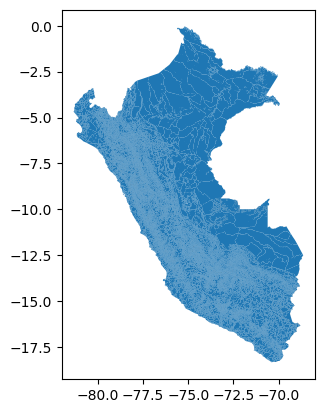

In [ ]:
gdf.plot()


In [ ]:
# 3. Resumen general del DataFrame
print("\n------------------------Información general del DataFrame:------------------------")
gdf.info()

# 7. Contar valores nulos por columna
print("\n------------------------Conteo de valores nulos y ceros:------------------------")
print((gdf.isnull() | (gdf == 0)).sum())

# # 10. Contar frecuencia de valores en una columna (reemplazar 'COLUMNA' por el nombre de una columna)
# print("\n------------------------Frecuencia de valores en una columna específica:------------------------")
# print(gdf['UBIGEO'].value_counts() if 'UBIGEO' in gdf.columns else "La columna especificada no existe.")


------------------------Información general del DataFrame:------------------------
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 73969 entries, 0 to 73968
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   OBJECTID     73969 non-null  int64   
 1   rango        73968 non-null  object  
 2   UBIGEO       73473 non-null  object  
 3   NOMBDEP      73473 non-null  object  
 4   NOMBPROV     73473 non-null  object  
 5   NOMBDIST     73473 non-null  object  
 6   Shape_Leng   73969 non-null  float64 
 7   Shape_Area   73969 non-null  float64 
 8   X            73969 non-null  float64 
 9   Y            73969 non-null  float64 
 10  geometry     73969 non-null  geometry
 11  coordinates  73969 non-null  object  
 12  P.E          73473 non-null  object  
dtypes: float64(4), geometry(1), int64(1), object(7)
memory usage: 7.3+ MB

------------------------Conteo de valores nulos y ceros:----------------------

In [ ]:
# Mostrar información inicial
print("\n--------------------Información inicial--------------------")
print(f"Total de filas antes de la limpieza: {len(gdf)}")
print("Frecuencia de clases en P.E antes de la limpieza:")
print(gdf[['NOMBDEP', 'NOMBPROV', 'NOMBDIST']].value_counts())

# Eliminar filas con nulos o ceros en las columnas de P.E
gdf_cleaned = gdf.dropna(subset=['NOMBDEP', 'NOMBPROV', 'NOMBDIST'])
gdf_cleaned = gdf_cleaned[~((gdf_cleaned['NOMBDEP'] == 0) | (gdf_cleaned['NOMBPROV'] == 0) | (gdf_cleaned['NOMBDIST'] == 0))]

# Mostrar información después de la limpieza
print("\n--------------------Información después de la limpieza--------------------")
print(f"Total de filas después de la limpieza: {len(gdf_cleaned)}")
print("Frecuencia de clases en P.E después de la limpieza:")
print(gdf_cleaned[['NOMBDEP', 'NOMBPROV', 'NOMBDIST']].value_counts())



--------------------Información inicial--------------------
Total de filas antes de la limpieza: 73969
Frecuencia de clases en P.E antes de la limpieza:
NOMBDEP        NOMBPROV   NOMBDIST         
UCAYALI        ATALAYA    YURUA                3258
               PURUS      PURUS                2784
               ATALAYA    RAIMONDI             2585
                          TAHUANIA             1915
LORETO         PUTUMAYO   YAGUAS               1111
                                               ... 
JUNIN          HUANCAYO   HUANCAN                 1
SAN MARTIN     PICOTA     SAN HILARION            1
LIMA           HUAURA     CALETA DE CARQUIN       1
MADRE DE DIOS  TAHUAMANU  TAHUAMANU               1
LIMA           CAÑETE     SAN ANTONIO             1
Name: count, Length: 1874, dtype: int64

--------------------Información después de la limpieza--------------------
Total de filas después de la limpieza: 73473
Frecuencia de clases en P.E después de la limpieza:
NOMBDEP        NO

Diferencia entre ls ubigeos repetidos

In [ ]:
# Agrupamos por P.E y verificamos si hay diferencias en las otras columnas
duplicated_pe = gdf_cleaned.groupby(['NOMBDEP', 'NOMBPROV', 'NOMBDIST']).filter(lambda x: len(x) > 1)

print("\n--------------------Registros duplicados por P.E--------------------")
print(f"Total de P.E duplicados: {len(duplicated_pe)}")
print("Ejemplo de duplicados:")
print(duplicated_pe.head(10))

# Listar las columnas que tienen valores diferentes dentro de los registros duplicados
print("\n--------------------Columnas con diferencias dentro de duplicados--------------------")
differences = duplicated_pe.groupby(['NOMBDEP', 'NOMBPROV', 'NOMBDIST']).agg(lambda x: x.nunique())
columns_with_differences = differences.loc[:, (differences > 1).any(axis=0)].columns
print(f"Columnas con diferencias: {columns_with_differences.tolist()}")

# Mostrar ejemplo de diferencias en una de las P.E duplicadas
example_pe = duplicated_pe.groupby(['NOMBDEP', 'NOMBPROV', 'NOMBDIST']).first().index[0]
print(f"\nEjemplo de diferencias para el P.E: {example_pe}")
print(duplicated_pe[(duplicated_pe['NOMBDEP'] == example_pe[0]) &
                    (duplicated_pe['NOMBPROV'] == example_pe[1]) &
                    (duplicated_pe['NOMBDIST'] == example_pe[2])])



--------------------Registros duplicados por P.E--------------------
Total de P.E duplicados: 73406
Ejemplo de duplicados:
     OBJECTID    rango  UBIGEO NOMBDEP  NOMBPROV                 NOMBDIST  \
496       497     None  210903    PUNO      MOHO               HUAYRAPATA   
497       498  23 - 25  160803  LORETO  PUTUMAYO  TENIENTE MANUEL CLAVERO   
498       499  23 - 25  160803  LORETO  PUTUMAYO  TENIENTE MANUEL CLAVERO   
499       500  23 - 25  160803  LORETO  PUTUMAYO  TENIENTE MANUEL CLAVERO   
500       501  23 - 25  160803  LORETO  PUTUMAYO  TENIENTE MANUEL CLAVERO   
501       502  23 - 25  160803  LORETO  PUTUMAYO  TENIENTE MANUEL CLAVERO   
502       503  21 - 23  160803  LORETO  PUTUMAYO  TENIENTE MANUEL CLAVERO   
503       504  21 - 23  160803  LORETO  PUTUMAYO  TENIENTE MANUEL CLAVERO   
504       505  21 - 23  160803  LORETO  PUTUMAYO  TENIENTE MANUEL CLAVERO   
505       506  21 - 23  160803  LORETO  PUTUMAYO  TENIENTE MANUEL CLAVERO   

     Shape_Leng    Shape_Are

Observamos que son todos los poligonos dentro de un distrito si no son el distrito en si, que son?

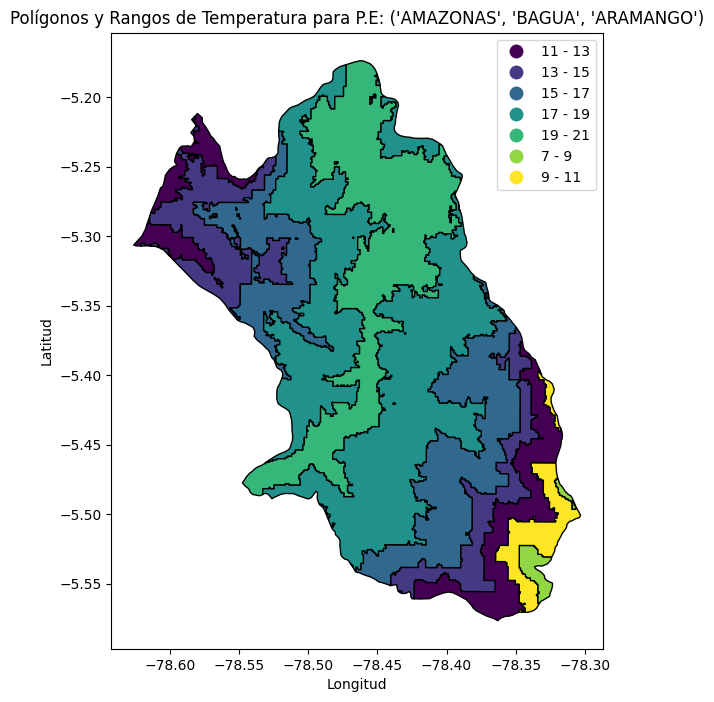


--------------------Rangos encontrados para el P.E seleccionado--------------------
rango
17 - 19    20
13 - 15    14
19 - 21    13
11 - 13    11
15 - 17    11
9 - 11      2
7 - 9       2
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt

# Filtrar un P.E específico para visualizar
pe_to_visualize = ('AMAZONAS', 'BAGUA', 'ARAMANGO')  # Cambia este valor según el distrito que desees analizar
gdf_pe = gdf_cleaned[(gdf_cleaned['NOMBDEP'] == pe_to_visualize[0]) &
                     (gdf_cleaned['NOMBPROV'] == pe_to_visualize[1]) &
                     (gdf_cleaned['NOMBDIST'] == pe_to_visualize[2])]

# Visualizar los polígonos en el mapa
fig, ax = plt.subplots(figsize=(10, 8))
gdf_pe.plot(column='rango', ax=ax, legend=True, cmap='viridis', edgecolor='black')
ax.set_title(f"Polígonos y Rangos de Temperatura para P.E: {pe_to_visualize}")
ax.set_xlabel("Longitud")
ax.set_ylabel("Latitud")
plt.show()

# Mostrar información sobre los rangos
print("\n--------------------Rangos encontrados para el P.E seleccionado--------------------")
print(gdf_pe['rango'].value_counts())


In [ ]:
import numpy as np

# Filtrar el P.E específico y crear una copia explícita
gdf_pe = gdf_cleaned[(gdf_cleaned['NOMBDEP'] == pe_to_visualize[0]) &
                     (gdf_cleaned['NOMBPROV'] == pe_to_visualize[1]) &
                     (gdf_cleaned['NOMBDIST'] == pe_to_visualize[2])].copy()

# Calcular el punto medio de los rangos
def rango_to_midpoint(rango):
    try:
        start, end = map(float, rango.split(' - '))
        return (start + end) / 2
    except:
        return np.nan

gdf_pe['rango_midpoint'] = gdf_pe['rango'].apply(rango_to_midpoint)

# Filtrar filas con rangos válidos
gdf_pe = gdf_pe.dropna(subset=['rango_midpoint', 'Shape_Area'])

# Calcular el promedio ponderado
weighted_mean = np.average(
    gdf_pe['rango_midpoint'],
    weights=gdf_pe['Shape_Area']
)

print("\n--------------------Temperatura representativa del P.E--------------------")
print(f"Temperatura promedio ponderada para {pe_to_visualize}: {weighted_mean:.2f} °C")



--------------------Temperatura representativa del P.E--------------------
Temperatura promedio ponderada para ('AMAZONAS', 'BAGUA', 'ARAMANGO'): 16.70 °C


CALCULAMOS DEL TODO EL PERU LAS TEMPERATURAS MINIMA PROMEDIO DE CADA DSITRITO SOLO DLE MES DE ABRIL

100%|██████████| 1875/1875 [01:05<00:00, 28.48it/s]


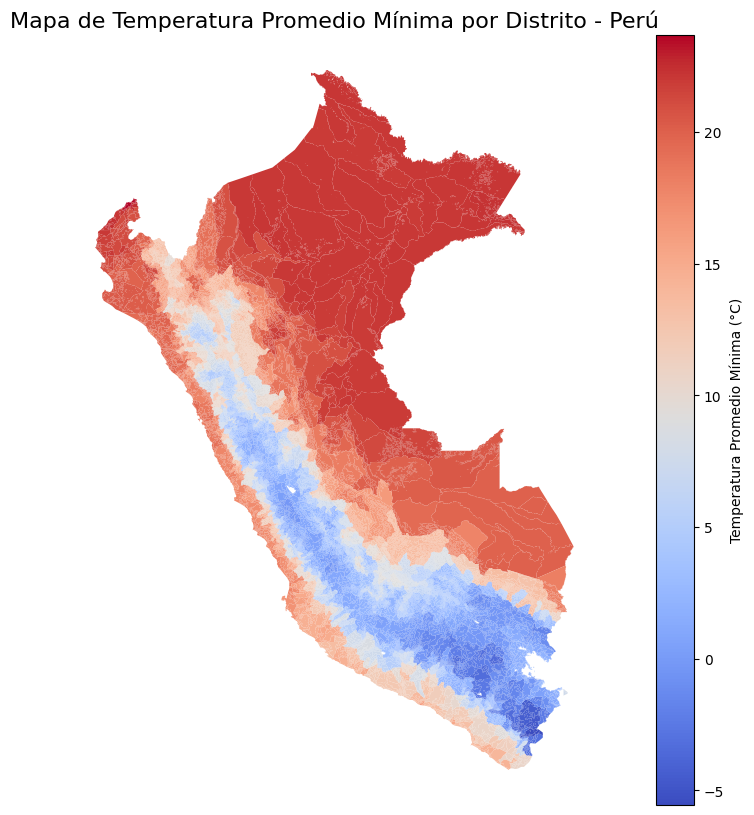


--------------------Resultados finales--------------------
Total de distritos analizados: 1875
Distritos con temperatura promedio mínima identificada: 1874
Distritos sin datos suficientes para identificar temperatura promedio mínima: 1

Tabla con resultados detallados:
  NOMBDEP  NOMBPROV                 NOMBDIST  Temperatura_Promedio_Minima  \
0    None      None                     None                          NaN   
1    PUNO      MOHO               HUAYRAPATA                     0.409555   
2  LORETO  PUTUMAYO  TENIENTE MANUEL CLAVERO                    22.172358   
3  LORETO    MAYNAS           TORRES CAUSANA                    22.037676   
4  LORETO  PUTUMAYO             ROSA PANDURO                    22.009028   
5  LORETO    MAYNAS                     NAPO                    21.906789   
6  LORETO    LORETO                    TIGRE                    22.001295   
7  LORETO  PUTUMAYO                 PUTUMAYO                    22.036252   
8  LORETO  PUTUMAYO                 

In [ ]:
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

# Función para calcular el punto medio de los rangos
def rango_to_midpoint(rango):
    try:
        start, end = map(float, rango.split(' - '))
        return (start + end) / 2
    except:
        return np.nan

# Calcular temperatura promedio ponderada para un P.E
def calcular_temperatura_promedio_pe(df_pe):
    df_pe = df_pe.dropna(subset=['rango_midpoint', 'Shape_Area'])  # Eliminar nulos
    if len(df_pe) > 0:
        return np.average(df_pe['rango_midpoint'], weights=df_pe['Shape_Area'])
    return np.nan

# Leer el GeoDataFrame
shapefile_path = '/content/T_MIN_NEW/abril.shp'  # Cambia la ruta si es necesario
gdf = gpd.read_file(shapefile_path)

# Calcular el punto medio de los rangos
gdf['rango_midpoint'] = gdf['rango'].apply(rango_to_midpoint)

# Obtener todos los P.E únicos
pes_unicos = gdf[['NOMBDEP', 'NOMBPROV', 'NOMBDIST']].drop_duplicates()

# Inicializar lista para guardar resultados
resultados = []

# Calcular temperatura promedio por P.E
for _, pe in tqdm(pes_unicos.iterrows(), total=len(pes_unicos)):
    dep, prov, dist = pe['NOMBDEP'], pe['NOMBPROV'], pe['NOMBDIST']
    df_pe = gdf[(gdf['NOMBDEP'] == dep) & (gdf['NOMBPROV'] == prov) & (gdf['NOMBDIST'] == dist)]
    temperatura_promedio = calcular_temperatura_promedio_pe(df_pe)
    resultados.append({
        'NOMBDEP': dep,
        'NOMBPROV': prov,
        'NOMBDIST': dist,
        'Temperatura_Promedio_Minima': temperatura_promedio
    })

# Crear DataFrame final
df_resultados = pd.DataFrame(resultados)

# Unir resultados al GeoDataFrame original para graficar
gdf_resultados = gdf[['NOMBDEP', 'NOMBPROV', 'NOMBDIST', 'geometry']].drop_duplicates()
gdf_resultados = gdf_resultados.merge(df_resultados, on=['NOMBDEP', 'NOMBPROV', 'NOMBDIST'], how='left')

# Graficar el mapa de Perú con temperaturas promedio
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
gdf_resultados.plot(column='Temperatura_Promedio_Minima', ax=ax, cmap='coolwarm', legend=True,
                    legend_kwds={'label': "Temperatura Promedio Mínima (°C)", 'orientation': "vertical"})
ax.set_title("Mapa de Temperatura Promedio Mínima por Distrito - Perú", fontsize=16)
ax.axis('off')
plt.show()

# Agregar más información al DataFrame final
df_resultados['Distrito_Identificado'] = ~df_resultados['Temperatura_Promedio_Minima'].isnull()
total_distritos = len(df_resultados)
distritos_identificados = df_resultados['Distrito_Identificado'].sum()
distritos_no_identificados = total_distritos - distritos_identificados

# Mostrar resultados finales en texto plano
print("\n--------------------Resultados finales--------------------")
print(f"Total de distritos analizados: {total_distritos}")
print(f"Distritos con temperatura promedio mínima identificada: {distritos_identificados}")
print(f"Distritos sin datos suficientes para identificar temperatura promedio mínima: {distritos_no_identificados}")
print("\nTabla con resultados detallados:")
print(df_resultados.head(10))  # Muestra las primeras 10 filas como ejemplo

# Guardar resultados en un archivo CSV (opcional)
df_resultados.to_csv('temperaturas_promedio_distritos.csv', index=False)


### Ahora calculamos de todo el peru de todos los meses las temperatura minima y lo guardamos en una tabla

In [ ]:
import geopandas as gpd
import numpy as np
import pandas as pd
import os
from tqdm import tqdm
import matplotlib.pyplot as plt

# Función para calcular el punto medio de los rangos
def rango_to_midpoint(rango):
    try:
        start, end = map(float, rango.split(' - '))
        return (start + end) / 2
    except:
        return np.nan

# Calcular temperatura promedio ponderada para un P.E
def calcular_temperatura_promedio_pe(df_pe):
    df_pe = df_pe.dropna(subset=['rango_midpoint', 'Shape_Area'])  # Eliminar nulos
    if len(df_pe) > 0:
        return np.average(df_pe['rango_midpoint'], weights=df_pe['Shape_Area'])
    return np.nan

# Ruta a la carpeta que contiene los archivos .shp
carpeta_shp = '/content/T_MIN_NEW'  # Cambia esta ruta según tu entorno

# Obtener lista de archivos .shp en la carpeta
archivos_shp = [f for f in os.listdir(carpeta_shp) if f.endswith('.shp')]

# Inicializar DataFrame para los resultados
tabla_global = pd.DataFrame()

# Iterar por cada archivo .shp (cada mes)
for archivo in archivos_shp:
    print(f"\nProcesando archivo: {archivo}")
    mes_nombre = archivo.split('.')[0]  # Suponemos que el nombre del archivo es el nombre del mes (ej., abril.shp)

    # Leer el GeoDataFrame
    gdf = gpd.read_file(os.path.join(carpeta_shp, archivo))

    # Calcular el punto medio de los rangos
    gdf['rango_midpoint'] = gdf['rango'].apply(rango_to_midpoint)

    # Obtener todos los P.E únicos
    pes_unicos = gdf[['NOMBDEP', 'NOMBPROV', 'NOMBDIST']].drop_duplicates()

    # Inicializar lista para guardar resultados del mes
    resultados_mes = []

    # Calcular temperatura promedio por P.E
    for _, pe in tqdm(pes_unicos.iterrows(), total=len(pes_unicos), desc=f"Procesando {mes_nombre}"):
        dep, prov, dist = pe['NOMBDEP'], pe['NOMBPROV'], pe['NOMBDIST']
        df_pe = gdf[(gdf['NOMBDEP'] == dep) & (gdf['NOMBPROV'] == prov) & (gdf['NOMBDIST'] == dist)]
        temperatura_promedio = calcular_temperatura_promedio_pe(df_pe)
        resultados_mes.append({
            'NOMBDEP': dep,
            'NOMBPROV': prov,
            'NOMBDIST': dist,
            mes_nombre: temperatura_promedio
        })

    # Crear DataFrame del mes
    df_resultados_mes = pd.DataFrame(resultados_mes)

    # Combinar con la tabla global
    if tabla_global.empty:
        tabla_global = df_resultados_mes
    else:
        tabla_global = tabla_global.merge(df_resultados_mes, on=['NOMBDEP', 'NOMBPROV', 'NOMBDIST'], how='outer')

# Eliminar filas con distritos completamente nulos en todas las columnas de meses
meses = [archivo.split('.')[0] for archivo in archivos_shp]
tabla_global = tabla_global.dropna(subset=meses, how='all')

# Mostrar estadísticas finales
print("\n--------------------Estadísticas finales--------------------")
print(f"Total de distritos procesados: {len(tabla_global)}")
print("Ejemplo de tabla final:")
print(tabla_global.head())

# Guardar resultados en un archivo CSV (opcional)
tabla_global.to_csv('temperaturas_promedio_todos_meses.csv', index=False)

print("\nTabla completa guardada como 'temperaturas_promedio_todos_meses.csv'")



Procesando archivo: noviembre.shp


Procesando noviembre: 100%|██████████| 1875/1875 [01:16<00:00, 24.54it/s]



Procesando archivo: enero.shp


Procesando enero: 100%|██████████| 1875/1875 [01:30<00:00, 20.63it/s]



Procesando archivo: anual.shp


Procesando anual: 100%|██████████| 1875/1875 [01:13<00:00, 25.60it/s]



Procesando archivo: febrero.shp


Procesando febrero: 100%|██████████| 1875/1875 [01:47<00:00, 17.36it/s]



Procesando archivo: diciembre.shp


Procesando diciembre: 100%|██████████| 1875/1875 [01:18<00:00, 23.80it/s]



Procesando archivo: marzo.shp


Procesando marzo: 100%|██████████| 1875/1875 [01:34<00:00, 19.90it/s]



Procesando archivo: julio.shp


Procesando julio: 100%|██████████| 1875/1875 [01:19<00:00, 23.50it/s]



Procesando archivo: junio.shp


Procesando junio: 100%|██████████| 1875/1875 [01:26<00:00, 21.75it/s]



Procesando archivo: setiembre.shp


Procesando setiembre: 100%|██████████| 1875/1875 [01:13<00:00, 25.67it/s]



Procesando archivo: octubre.shp


Procesando octubre: 100%|██████████| 1875/1875 [01:16<00:00, 24.52it/s]



Procesando archivo: verano.shp


Procesando verano: 100%|██████████| 1875/1875 [01:39<00:00, 18.90it/s]



Procesando archivo: invierno.shp


Procesando invierno: 100%|██████████| 1875/1875 [01:29<00:00, 21.04it/s]



Procesando archivo: mayo.shp


Procesando mayo: 100%|██████████| 1875/1875 [01:21<00:00, 23.02it/s]



Procesando archivo: otoño.shp


Procesando otoño: 100%|██████████| 1875/1875 [01:17<00:00, 24.27it/s]



Procesando archivo: agosto.shp


Procesando agosto: 100%|██████████| 1875/1875 [01:24<00:00, 22.17it/s]



Procesando archivo: abril.shp


Procesando abril: 100%|██████████| 1875/1875 [01:22<00:00, 22.60it/s]


--------------------Estadísticas finales--------------------
Total de distritos procesados: 1874
Ejemplo de tabla final:
    NOMBDEP NOMBPROV  NOMBDIST  noviembre      enero      anual    febrero  \
0  AMAZONAS    BAGUA  ARAMANGO  16.705349  16.459685  16.108781  16.391818   
1  AMAZONAS    BAGUA     BAGUA  20.468198  19.670997  19.824003  19.631474   
2  AMAZONAS    BAGUA  COPALLIN  16.275619  16.379788  16.032261  16.493031   
3  AMAZONAS    BAGUA  EL PARCO  20.000000  19.980193  19.954434  19.971027   
4  AMAZONAS    BAGUA     IMAZA  18.511649  18.321999  18.209267  18.533882   

   diciembre      marzo      julio      junio  setiembre    octubre  \
0  16.685998  16.243998  14.864987  15.604020  15.529762  16.449904   
1  20.159282  19.604833  19.371272  19.983100  19.897871  20.580930   
2  16.407880  16.404540  14.610382  15.718490  15.574762  16.122082   
3  20.000000  19.923645  18.204903  19.851754  19.216856  19.999765   
4  18.432475  18.567990  17.433604  18.002770  17.8956

# T_MAX_NEW

In [ ]:
import geopandas as gpd

# Especifica la ruta al archivo .shp
shapefile_path = '/content/T_MAX_NEW/ABRIL.shp'  # Cambia esta ruta según dónde lo subas en Colab
gdf = gpd.read_file(shapefile_path)

# Muestra los primeros datos
gdf


,OBJECTID,rango,UBIGEO,NOMBDEP,NOMBPROV,NOMBDIST,Shape_Leng,Shape_Area,X,Y,geometry
0,1,13 - 15,None,None,None,None,0.003639,8.277069e-07,-76.049093,-11.037309,"POLYGON ((-76.04955 -11.03776, -76.04955 -11.0..."
1,2,13 - 15,None,None,None,None,0.034584,5.876859e-05,-76.030706,-11.040200,"POLYGON ((-76.02575 -11.03694, -76.02577 -11.0..."
2,3,11 - 13,None,None,None,None,0.009109,3.310919e-06,-76.054619,-11.046785,"POLYGON ((-76.05324 -11.04589, -76.05325 -11.0..."
3,4,11 - 13,None,None,None,None,0.003639,8.277348e-07,-76.061038,-11.049927,"POLYGON ((-76.06058 -11.04948, -76.06058 -11.0..."
4,5,11 - 13,None,None,None,None,0.003639,8.277384e-07,-76.059210,-11.050838,"POLYGON ((-76.05875 -11.05129, -76.05967 -11.0..."
...,...,...,...,...,...,...,...,...,...,...,...
161415,161416,19 - 21,010107,AMAZONAS,CHACHAPOYAS,GRANADA,0.001529,2.703123e-09,-77.658526,-6.056527,"POLYGON ((-77.65885 -6.0568, -77.65846 -6.0564..."
161416,161417,25 - 27,120606,JUNIN,SATIPO,PANGOA,0.005252,3.352883e-08,-74.439901,-11.346415,"POLYGON ((-74.44061 -11.3468, -74.44049 -11.34..."
161417,161418,25 - 27,120604,JUNIN,SATIPO,MAZAMARI,0.005252,3.352883e-08,-74.439901,-11.346415,"POLYGON ((-74.44061 -11.3468, -74.44049 -11.34..."
161418,161419,31 - 33,250401,UCAYALI,PURUS,PURUS,0.006538,3.768706e-07,-70.658812,-10.053016,"POLYGON ((-70.65813 -10.05409, -70.66003 -10.0..."


In [ ]:
print(gdf.columns)
print(gdf.crs)
gdf['coordinates'] = gdf.geometry.apply(lambda geom: geom.centroid.coords[0])
print(gdf[['coordinates']])

Index(['OBJECTID', 'rango', 'UBIGEO', 'NOMBDEP', 'NOMBPROV', 'NOMBDIST',
       'Shape_Leng', 'Shape_Area', 'X', 'Y', 'geometry'],
      dtype='object')
EPSG:4326
                                      coordinates
0        (-76.04909308600354, -11.03730943240649)
1       (-76.03070576158186, -11.040199954215394)
2       (-76.05461903411583, -11.046784923192934)
3         (-76.0610380019287, -11.04992737576987)
4       (-76.05921048562777, -11.050838031746332)
...                                           ...
161415   (-77.65852572406675, -6.056527085825161)
161416  (-74.43990071234806, -11.346415200401129)
161417  (-74.43990071234806, -11.346415200401129)
161418  (-70.65881183100105, -10.053016243904363)
161419  (-70.65881183100105, -10.053016243904363)

[161420 rows x 1 columns]


<Axes: >

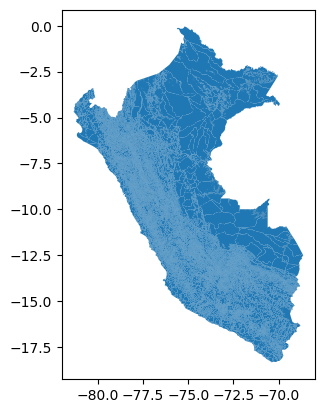

In [ ]:
gdf.plot()


In [ ]:
# 3. Resumen general del DataFrame
print("\n------------------------Información general del DataFrame:------------------------")
gdf.info()

# 7. Contar valores nulos por columna
print("\n------------------------Conteo de valores nulos y ceros:------------------------")
print((gdf.isnull() | (gdf == 0)).sum())

# # 10. Contar frecuencia de valores en una columna (reemplazar 'COLUMNA' por el nombre de una columna)
# print("\n------------------------Frecuencia de valores en una columna específica:------------------------")
# print(gdf['UBIGEO'].value_counts() if 'UBIGEO' in gdf.columns else "La columna especificada no existe.")


------------------------Información general del DataFrame:------------------------
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 161420 entries, 0 to 161419
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   OBJECTID     161420 non-null  int64   
 1   rango        161418 non-null  object  
 2   UBIGEO       160434 non-null  object  
 3   NOMBDEP      160434 non-null  object  
 4   NOMBPROV     160434 non-null  object  
 5   NOMBDIST     160434 non-null  object  
 6   Shape_Leng   161420 non-null  float64 
 7   Shape_Area   161420 non-null  float64 
 8   X            161420 non-null  float64 
 9   Y            161420 non-null  float64 
 10  geometry     161420 non-null  geometry
 11  coordinates  161420 non-null  object  
dtypes: float64(4), geometry(1), int64(1), object(6)
memory usage: 14.8+ MB

------------------------Conteo de valores nulos y ceros:------------------------
OBJECTID         0
rang

In [ ]:
# Mostrar información inicial
print("\n--------------------Información inicial--------------------")
print(f"Total de filas antes de la limpieza: {len(gdf)}")
print("Frecuencia de clases en P.E antes de la limpieza:")
print(gdf[['NOMBDEP', 'NOMBPROV', 'NOMBDIST']].value_counts())

# Eliminar filas con nulos o ceros en las columnas de P.E
gdf_cleaned = gdf.dropna(subset=['NOMBDEP', 'NOMBPROV', 'NOMBDIST'])
gdf_cleaned = gdf_cleaned[~((gdf_cleaned['NOMBDEP'] == 0) | (gdf_cleaned['NOMBPROV'] == 0) | (gdf_cleaned['NOMBDIST'] == 0))]

# Mostrar información después de la limpieza
print("\n--------------------Información después de la limpieza--------------------")
print(f"Total de filas después de la limpieza: {len(gdf_cleaned)}")
print("Frecuencia de clases en P.E después de la limpieza:")
print(gdf_cleaned[['NOMBDEP', 'NOMBPROV', 'NOMBDIST']].value_counts())


--------------------Información inicial--------------------
Total de filas antes de la limpieza: 161420
Frecuencia de clases en P.E antes de la limpieza:
NOMBDEP      NOMBPROV           NOMBDIST  
LORETO       PUTUMAYO           YAGUAS        11400
             DATEM DEL MARAÑON  ANDOAS         8567
             MAYNAS             ALTO NANAY     7362
UCAYALI      CORONEL PORTILLO   MASISEA        6398
LORETO       DATEM DEL MARAÑON  PASTAZA        4802
                                              ...  
JUNIN        JAUJA              PANCAN            1
                                SAUSA             1
                                YAUYOS            1
LA LIBERTAD  ASCOPE             CHOCOPE           1
LIMA         HUAURA             HUALMAY           1
Name: count, Length: 1874, dtype: int64

--------------------Información después de la limpieza--------------------
Total de filas después de la limpieza: 160434
Frecuencia de clases en P.E después de la limpieza:
NOMBDEP      NOM

In [ ]:
# Agrupamos por P.E y verificamos si hay diferencias en las otras columnas
duplicated_pe = gdf_cleaned.groupby(['NOMBDEP', 'NOMBPROV', 'NOMBDIST']).filter(lambda x: len(x) > 1)

print("\n--------------------Registros duplicados por P.E--------------------")
print(f"Total de P.E duplicados: {len(duplicated_pe)}")
print("Ejemplo de duplicados:")
print(duplicated_pe.head(10))

# Listar las columnas que tienen valores diferentes dentro de los registros duplicados
print("\n--------------------Columnas con diferencias dentro de duplicados--------------------")
differences = duplicated_pe.groupby(['NOMBDEP', 'NOMBPROV', 'NOMBDIST']).agg(lambda x: x.nunique())
columns_with_differences = differences.loc[:, (differences > 1).any(axis=0)].columns
print(f"Columnas con diferencias: {columns_with_differences.tolist()}")

# Mostrar ejemplo de diferencias en una de las P.E duplicadas
example_pe = duplicated_pe.groupby(['NOMBDEP', 'NOMBPROV', 'NOMBDIST']).first().index[0]
print(f"\nEjemplo de diferencias para el P.E: {example_pe}")
print(duplicated_pe[(duplicated_pe['NOMBDEP'] == example_pe[0]) &
                    (duplicated_pe['NOMBPROV'] == example_pe[1]) &
                    (duplicated_pe['NOMBDIST'] == example_pe[2])])


--------------------Registros duplicados por P.E--------------------
Total de P.E duplicados: 160368
Ejemplo de duplicados:
     OBJECTID    rango  UBIGEO NOMBDEP  NOMBPROV                 NOMBDIST  \
986       987     None  210404    PUNO  CHUCUITO                  KELLUYO   
987       988     None  210903    PUNO      MOHO               HUAYRAPATA   
988       989  29 - 31  160803  LORETO  PUTUMAYO  TENIENTE MANUEL CLAVERO   
989       990  29 - 31  160110  LORETO    MAYNAS           TORRES CAUSANA   
990       991  29 - 31  160803  LORETO  PUTUMAYO  TENIENTE MANUEL CLAVERO   
991       992  29 - 31  160110  LORETO    MAYNAS           TORRES CAUSANA   
992       993  29 - 31  160803  LORETO  PUTUMAYO  TENIENTE MANUEL CLAVERO   
993       994  29 - 31  160803  LORETO  PUTUMAYO  TENIENTE MANUEL CLAVERO   
994       995  29 - 31  160110  LORETO    MAYNAS           TORRES CAUSANA   
995       996  29 - 31  160110  LORETO    MAYNAS           TORRES CAUSANA   

     Shape_Leng    Shape_Ar

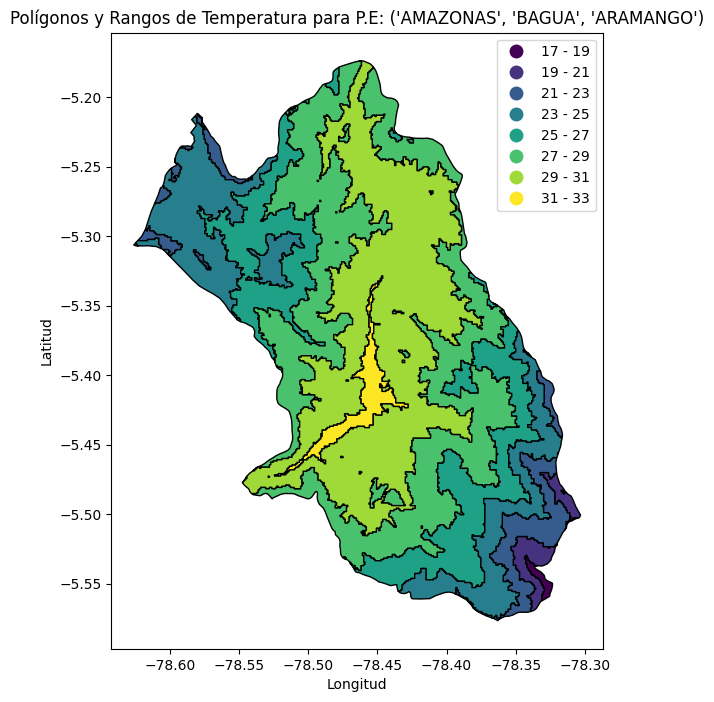


--------------------Rangos encontrados para el P.E seleccionado--------------------
rango
25 - 27    17
27 - 29    17
21 - 23    15
29 - 31    10
31 - 33     6
23 - 25     6
19 - 21     4
17 - 19     3
Name: count, dtype: int64

--------------------Temperatura representativa del P.E--------------------
Temperatura promedio ponderada para ('AMAZONAS', 'BAGUA', 'ARAMANGO'): 27.37 °C


In [ ]:
import matplotlib.pyplot as plt

# Filtrar un P.E específico para visualizar
pe_to_visualize = ('AMAZONAS', 'BAGUA', 'ARAMANGO')  # Cambia este valor según el distrito que desees analizar
gdf_pe = gdf_cleaned[(gdf_cleaned['NOMBDEP'] == pe_to_visualize[0]) &
                     (gdf_cleaned['NOMBPROV'] == pe_to_visualize[1]) &
                     (gdf_cleaned['NOMBDIST'] == pe_to_visualize[2])]

# Visualizar los polígonos en el mapa
fig, ax = plt.subplots(figsize=(10, 8))
gdf_pe.plot(column='rango', ax=ax, legend=True, cmap='viridis', edgecolor='black')
ax.set_title(f"Polígonos y Rangos de Temperatura para P.E: {pe_to_visualize}")
ax.set_xlabel("Longitud")
ax.set_ylabel("Latitud")
plt.show()

# Mostrar información sobre los rangos
print("\n--------------------Rangos encontrados para el P.E seleccionado--------------------")
print(gdf_pe['rango'].value_counts())


import numpy as np

# Filtrar el P.E específico y crear una copia explícita
gdf_pe = gdf_cleaned[(gdf_cleaned['NOMBDEP'] == pe_to_visualize[0]) &
                     (gdf_cleaned['NOMBPROV'] == pe_to_visualize[1]) &
                     (gdf_cleaned['NOMBDIST'] == pe_to_visualize[2])].copy()

# Calcular el punto medio de los rangos
def rango_to_midpoint(rango):
    try:
        start, end = map(float, rango.split(' - '))
        return (start + end) / 2
    except:
        return np.nan

gdf_pe['rango_midpoint'] = gdf_pe['rango'].apply(rango_to_midpoint)

# Filtrar filas con rangos válidos
gdf_pe = gdf_pe.dropna(subset=['rango_midpoint', 'Shape_Area'])

# Calcular el promedio ponderado
weighted_mean = np.average(
    gdf_pe['rango_midpoint'],
    weights=gdf_pe['Shape_Area']
)

print("\n--------------------Temperatura representativa del P.E--------------------")
print(f"Temperatura promedio ponderada para {pe_to_visualize}: {weighted_mean:.2f} °C")

In [ ]:
import geopandas as gpd
import numpy as np
import pandas as pd
import os
from tqdm import tqdm
import matplotlib.pyplot as plt

# Función para calcular el punto medio de los rangos
def rango_to_midpoint(rango):
    try:
        start, end = map(float, rango.split(' - '))
        return (start + end) / 2
    except:
        return np.nan

# Calcular temperatura promedio ponderada para un P.E
def calcular_temperatura_promedio_pe(df_pe):
    df_pe = df_pe.dropna(subset=['rango_midpoint', 'Shape_Area'])  # Eliminar nulos
    if len(df_pe) > 0:
        return np.average(df_pe['rango_midpoint'], weights=df_pe['Shape_Area'])
    return np.nan

# Ruta a la carpeta que contiene los archivos .shp
carpeta_shp = '/content/T_MAX_NEW'  # Cambia esta ruta según tu entorno

# Obtener lista de archivos .shp en la carpeta
archivos_shp = [f for f in os.listdir(carpeta_shp) if f.endswith('.shp')]

# Inicializar DataFrame para los resultados
tabla_global = pd.DataFrame()

# Iterar por cada archivo .shp (cada mes)
for archivo in archivos_shp:
    print(f"\nProcesando archivo: {archivo}")
    mes_nombre = archivo.split('.')[0]  # Usar el nombre del archivo como columna (en mayúsculas)

    # Leer el GeoDataFrame
    gdf = gpd.read_file(os.path.join(carpeta_shp, archivo))

    # Calcular el punto medio de los rangos
    gdf['rango_midpoint'] = gdf['rango'].apply(rango_to_midpoint)

    # Obtener todos los P.E únicos
    pes_unicos = gdf[['NOMBDEP', 'NOMBPROV', 'NOMBDIST']].drop_duplicates()

    # Inicializar lista para guardar resultados del mes
    resultados_mes = []

    # Calcular temperatura promedio por P.E
    for _, pe in tqdm(pes_unicos.iterrows(), total=len(pes_unicos), desc=f"Procesando {mes_nombre}"):
        dep, prov, dist = pe['NOMBDEP'], pe['NOMBPROV'], pe['NOMBDIST']
        df_pe = gdf[(gdf['NOMBDEP'] == dep) & (gdf['NOMBPROV'] == prov) & (gdf['NOMBDIST'] == dist)]
        temperatura_promedio = calcular_temperatura_promedio_pe(df_pe)
        resultados_mes.append({
            'NOMBDEP': dep,
            'NOMBPROV': prov,
            'NOMBDIST': dist,
            mes_nombre: temperatura_promedio
        })

    # Crear DataFrame del mes
    df_resultados_mes = pd.DataFrame(resultados_mes)

    # Combinar con la tabla global
    if tabla_global.empty:
        tabla_global = df_resultados_mes
    else:
        tabla_global = tabla_global.merge(df_resultados_mes, on=['NOMBDEP', 'NOMBPROV', 'NOMBDIST'], how='outer')

# Eliminar filas con distritos completamente nulos en todas las columnas de meses
meses = [archivo.split('.')[0] for archivo in archivos_shp]
tabla_global = tabla_global.dropna(subset=meses, how='all')

# Mostrar estadísticas finales
print("\n--------------------Estadísticas finales--------------------")
print(f"Total de distritos procesados: {len(tabla_global)}")
print("Ejemplo de tabla final:")
print(tabla_global.head())

# Guardar resultados en un archivo CSV (opcional)
tabla_global.to_csv('temperaturas_maximas_promedio_todos_meses.csv', index=False)

print("\nTabla completa guardada como 'temperaturas_maximas_promedio_todos_meses.csv'")



Procesando archivo: INVIERNO.shp


Procesando INVIERNO: 100%|██████████| 1875/1875 [01:21<00:00, 22.98it/s]



Procesando archivo: MAYO.shp


Procesando MAYO: 100%|██████████| 1875/1875 [02:15<00:00, 13.82it/s]



Procesando archivo: AGOSTO.shp


Procesando AGOSTO: 100%|██████████| 1875/1875 [01:23<00:00, 22.38it/s]



Procesando archivo: OCTUBRE.shp


Procesando OCTUBRE: 100%|██████████| 1875/1875 [01:20<00:00, 23.27it/s]



Procesando archivo: MARZO.shp


Procesando MARZO: 100%|██████████| 1875/1875 [01:51<00:00, 16.84it/s]



Procesando archivo: DICIEMBRE.shp


Procesando DICIEMBRE: 100%|██████████| 1875/1875 [01:20<00:00, 23.31it/s]



Procesando archivo: ENERO.shp


Procesando ENERO: 100%|██████████| 1875/1875 [01:35<00:00, 19.64it/s]



Procesando archivo: SETIEMBRE.shp


Procesando SETIEMBRE: 100%|██████████| 1875/1875 [01:24<00:00, 22.16it/s]



Procesando archivo: VERANO.shp


Procesando VERANO: 100%|██████████| 1875/1875 [01:39<00:00, 18.81it/s]



Procesando archivo: JUNIO.shp


Procesando JUNIO: 100%|██████████| 1875/1875 [01:34<00:00, 19.83it/s]



Procesando archivo: NOVIEMBRE.shp


Procesando NOVIEMBRE: 100%|██████████| 1875/1875 [01:21<00:00, 22.91it/s]



Procesando archivo: ABRIL.shp


Procesando ABRIL: 100%|██████████| 1875/1875 [02:32<00:00, 12.27it/s]



Procesando archivo: FEBRERO.shp


Procesando FEBRERO: 100%|██████████| 1875/1875 [01:58<00:00, 15.77it/s]



Procesando archivo: ANUAL.shp


Procesando ANUAL: 100%|██████████| 1875/1875 [01:20<00:00, 23.15it/s]



Procesando archivo: JULIO.shp


Procesando JULIO: 100%|██████████| 1875/1875 [02:06<00:00, 14.78it/s]



Procesando archivo: PRIMAVERA.shp


Procesando PRIMAVERA: 100%|██████████| 1875/1875 [01:17<00:00, 24.13it/s]



Procesando archivo: OTOÑO.shp


Procesando OTOÑO: 100%|██████████| 1875/1875 [02:43<00:00, 11.50it/s]



--------------------Estadísticas finales--------------------
Total de distritos procesados: 1874
Ejemplo de tabla final:
    NOMBDEP NOMBPROV  NOMBDIST   INVIERNO       MAYO     AGOSTO    OCTUBRE  \
0  AMAZONAS    BAGUA  ARAMANGO  26.863174  27.111162  26.810782  28.228055   
1  AMAZONAS    BAGUA     BAGUA  30.520419  30.209566  30.530455  31.899539   
2  AMAZONAS    BAGUA  COPALLIN  26.640124  26.692143  26.566268  28.179436   
3  AMAZONAS    BAGUA  EL PARCO  30.007970  29.989424  30.010680  31.877391   
4  AMAZONAS    BAGUA     IMAZA  26.780580  27.356814  26.749295  27.947892   

       MARZO  DICIEMBRE      ENERO  SETIEMBRE     VERANO      JUNIO  \
0  27.505999  28.109687  27.076085  27.614823  27.140192  26.405174   
1  30.830805  31.484104  30.873373  31.548531  30.779754  29.663877   
2  26.824876  27.838548  26.916340  27.506804  26.790089  26.232811   
3  30.163648  31.613463  30.324965  31.386001  30.174626  29.754390   
4  27.826918  28.076469  27.759810  27.465628  27.7117

# PRECIPITACION

In [ ]:
import geopandas as gpd

# Especifica la ruta al archivo .shp
shapefile_path = '/content/PRECIPI/ABRIL.shp'  # Cambia esta ruta según dónde lo subas en Colab
gdf = gpd.read_file(shapefile_path)

# Muestra los primeros datos
gdf

,OBJECTID,rango,UBIGEO,NOMBDEP,NOMBPROV,NOMBDIST,Shape_Leng,Shape_Area,X,Y,geometry
0,1,80 - 120,None,None,None,None,0.203535,1.258889e-03,-76.226338,-10.934255,"MULTIPOLYGON (((-76.19849 -10.94949, -76.24179..."
1,2,50 - 80,None,None,None,None,0.018230,9.190514e-06,-69.980473,-15.144076,"POLYGON ((-69.98075 -15.14142, -69.98072 -15.1..."
2,3,20 - 50,None,None,None,None,0.003657,8.355370e-07,-69.977171,-15.155307,"POLYGON ((-69.97762 -15.15577, -69.97765 -15.1..."
3,4,20 - 50,None,None,None,None,0.003656,8.354353e-07,-69.936373,-15.154392,"POLYGON ((-69.9359 -15.15483, -69.93683 -15.15..."
4,5,20 - 50,None,None,None,None,0.003657,8.355426e-07,-69.978077,-15.156228,"POLYGON ((-69.97762 -15.15577, -69.9776 -15.15..."
...,...,...,...,...,...,...,...,...,...,...,...
37748,37749,120 - 160,010107,AMAZONAS,CHACHAPOYAS,GRANADA,0.001529,2.703123e-09,-77.658526,-6.056527,"POLYGON ((-77.65885 -6.0568, -77.65846 -6.0564..."
37749,37750,160 - 200,250401,UCAYALI,PURUS,PURUS,0.006538,3.768706e-07,-70.658812,-10.053016,"POLYGON ((-70.65813 -10.05409, -70.66003 -10.0..."
37750,37751,160 - 200,170301,MADRE DE DIOS,TAHUAMANU,IÑAPARI,0.006538,3.768706e-07,-70.658812,-10.053016,"POLYGON ((-70.65813 -10.05409, -70.66003 -10.0..."
37751,37752,80 - 120,120606,JUNIN,SATIPO,PANGOA,0.005252,3.352883e-08,-74.439901,-11.346415,"POLYGON ((-74.44061 -11.3468, -74.44049 -11.34..."


In [ ]:
# 3. Resumen general del DataFrame
print("\n------------------------Información general del DataFrame:------------------------")
gdf.info()

# 7. Contar valores nulos por columna
print("\n------------------------Conteo de valores nulos y ceros:------------------------")
print((gdf.isnull() | (gdf == 0)).sum())



------------------------Información general del DataFrame:------------------------
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 37753 entries, 0 to 37752
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    37753 non-null  int64   
 1   rango       37750 non-null  object  
 2   UBIGEO      37669 non-null  object  
 3   NOMBDEP     37669 non-null  object  
 4   NOMBPROV    37669 non-null  object  
 5   NOMBDIST    37669 non-null  object  
 6   Shape_Leng  37753 non-null  float64 
 7   Shape_Area  37753 non-null  float64 
 8   X           37753 non-null  float64 
 9   Y           37753 non-null  float64 
 10  geometry    37753 non-null  geometry
dtypes: float64(4), geometry(1), int64(1), object(5)
memory usage: 3.2+ MB

------------------------Conteo de valores nulos y ceros:------------------------
OBJECTID       0
rango          3
UBIGEO        84
NOMBDEP       84
NOMBPROV      84
NOMBDIST   

In [ ]:
# Mostrar información inicial
print("\n--------------------Información inicial--------------------")
print(f"Total de filas antes de la limpieza: {len(gdf)}")
print("Frecuencia de clases en P.E antes de la limpieza:")
print(gdf[['NOMBDEP', 'NOMBPROV', 'NOMBDIST']].value_counts())

# Eliminar filas con nulos o ceros en las columnas de P.E
gdf_cleaned = gdf.dropna(subset=['NOMBDEP', 'NOMBPROV', 'NOMBDIST'])
gdf_cleaned = gdf_cleaned[~((gdf_cleaned['NOMBDEP'] == 0) | (gdf_cleaned['NOMBPROV'] == 0) | (gdf_cleaned['NOMBDIST'] == 0))]

# Mostrar información después de la limpieza
print("\n--------------------Información después de la limpieza--------------------")
print(f"Total de filas después de la limpieza: {len(gdf_cleaned)}")
print("Frecuencia de clases en P.E después de la limpieza:")
print(gdf_cleaned[['NOMBDEP', 'NOMBPROV', 'NOMBDIST']].value_counts())



--------------------Información inicial--------------------
Total de filas antes de la limpieza: 37753
Frecuencia de clases en P.E antes de la limpieza:
NOMBDEP       NOMBPROV          NOMBDIST               
SAN MARTIN    MARISCAL CACERES  HUICUNGO                   817
UCAYALI       CORONEL PORTILLO  MASISEA                    668
LORETO        LORETO            TIGRE                      665
CUSCO         LA CONVENCION     ECHARATE                   651
LORETO        REQUENA           YAQUERANA                  473
                                                          ... 
ICA           ICA               PUEBLO NUEVO                 1
                                SAN JOSE DE LOS MOLINOS      1
MOQUEGUA      ILO               EL ALGARROBAL                1
ICA           ICA               TATE                         1
HUANCAVELICA  CHURCAMPA         SAN MIGUEL DE MAYOCC         1
Name: count, Length: 1874, dtype: int64

--------------------Información después de la limpieza--

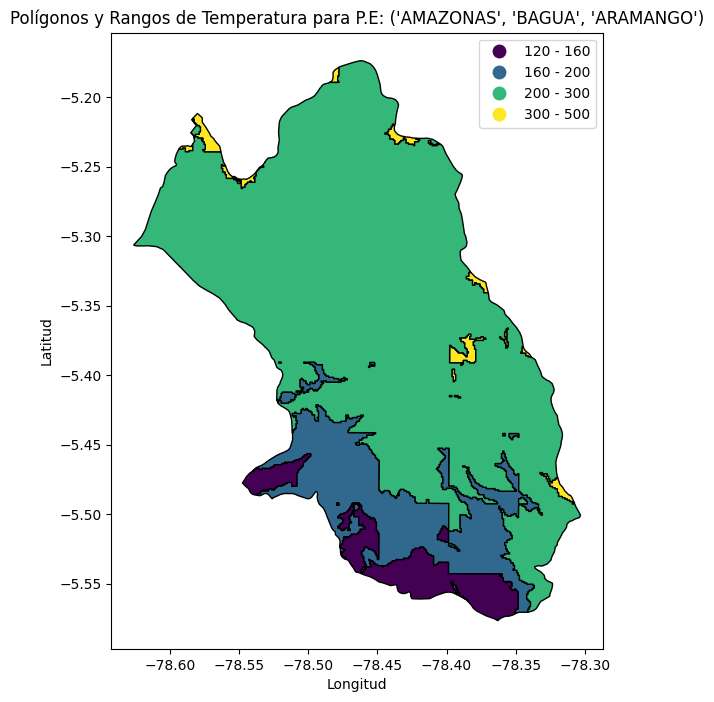


--------------------Rangos encontrados para el P.E seleccionado--------------------
rango
300 - 500    24
160 - 200    18
200 - 300     9
120 - 160     4
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt

# Filtrar un P.E específico para visualizar
pe_to_visualize = ('AMAZONAS', 'BAGUA', 'ARAMANGO')  # Cambia este valor según el distrito que desees analizar
gdf_pe = gdf_cleaned[(gdf_cleaned['NOMBDEP'] == pe_to_visualize[0]) &
                     (gdf_cleaned['NOMBPROV'] == pe_to_visualize[1]) &
                     (gdf_cleaned['NOMBDIST'] == pe_to_visualize[2])]

# Visualizar los polígonos en el mapa
fig, ax = plt.subplots(figsize=(10, 8))
gdf_pe.plot(column='rango', ax=ax, legend=True, cmap='viridis', edgecolor='black')
ax.set_title(f"Polígonos y Rangos de Temperatura para P.E: {pe_to_visualize}")
ax.set_xlabel("Longitud")
ax.set_ylabel("Latitud")
plt.show()

# Mostrar información sobre los rangos
print("\n--------------------Rangos encontrados para el P.E seleccionado--------------------")
print(gdf_pe['rango'].value_counts())


In [ ]:
import numpy as np

# Filtrar el P.E específico y crear una copia explícita
gdf_pe = gdf_cleaned[(gdf_cleaned['NOMBDEP'] == pe_to_visualize[0]) &
                     (gdf_cleaned['NOMBPROV'] == pe_to_visualize[1]) &
                     (gdf_cleaned['NOMBDIST'] == pe_to_visualize[2])].copy()

# Calcular el punto medio de los rangos
def rango_to_midpoint(rango):
    try:
        start, end = map(float, rango.split(' - '))
        return (start + end) / 2
    except:
        return np.nan

gdf_pe['rango_midpoint'] = gdf_pe['rango'].apply(rango_to_midpoint)

# Filtrar filas con rangos válidos
gdf_pe = gdf_pe.dropna(subset=['rango_midpoint', 'Shape_Area'])

# Calcular el promedio ponderado
weighted_mean = np.average(
    gdf_pe['rango_midpoint'],
    weights=gdf_pe['Shape_Area']
)

print("\n--------------------Precipitacion media representativa del P.E--------------------")
print(f"Precipitacion promedio ponderada para {pe_to_visualize}: {weighted_mean:.2f}")



--------------------Precipitacion media representativa del P.E--------------------
Precipitacion promedio ponderada para ('AMAZONAS', 'BAGUA', 'ARAMANGO'): 235.32


100%|██████████| 1875/1875 [00:38<00:00, 49.22it/s]


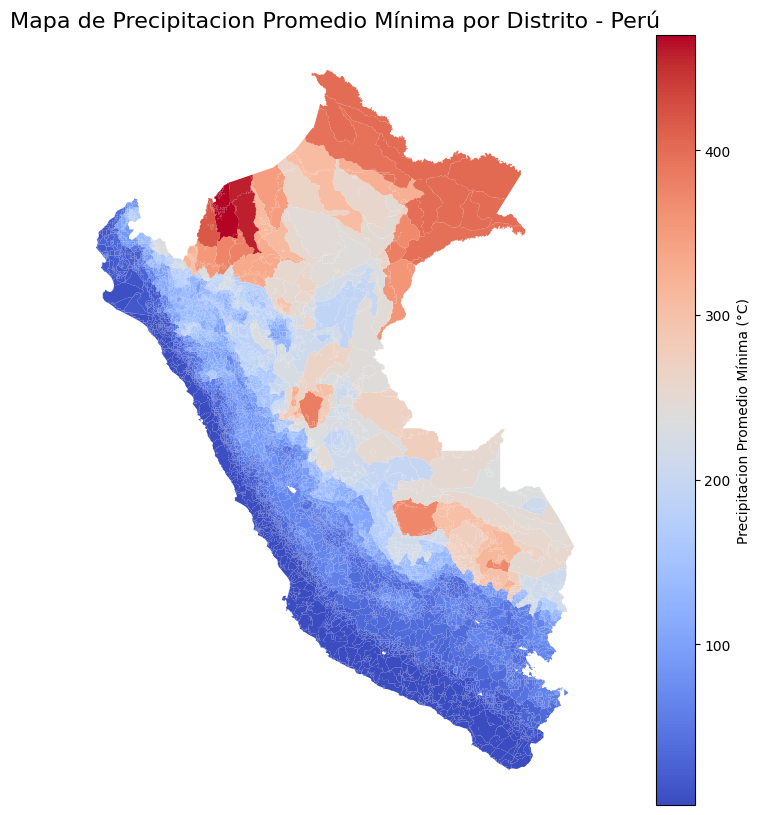


--------------------Resultados finales--------------------
Total de distritos analizados: 1875
Distritos con temperatura promedio mínima identificada: 1874
Distritos sin datos suficientes para identificar temperatura promedio mínima: 1

Tabla con resultados detallados:
  NOMBDEP  NOMBPROV     NOMBDIST  Precipitacion_Promedio_Minima  \
0    None      None         None                            NaN   
1    PUNO  CHUCUITO      KELLUYO                      36.977051   
2    PUNO      MOHO   HUAYRAPATA                      57.411657   
3     ICA     PISCO      PARACAS                       2.500000   
4  LORETO  PUTUMAYO     PUTUMAYO                     400.716584   
5  LORETO    LORETO        TIGRE                     309.182235   
6  LORETO  PUTUMAYO       YAGUAS                     404.159917   
7  LORETO    LORETO  TROMPETEROS                     263.860431   
8  LORETO    MAYNAS        MAZAN                     324.297314   
9  LORETO    MAYNAS   ALTO NANAY                     257.58

In [ ]:
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

# Función para calcular el punto medio de los rangos
def rango_to_midpoint(rango):
    try:
        start, end = map(float, rango.split(' - '))
        return (start + end) / 2
    except:
        return np.nan

# Calcular temperatura promedio ponderada para un P.E
def calcular_temperatura_promedio_pe(df_pe):
    df_pe = df_pe.dropna(subset=['rango_midpoint', 'Shape_Area'])  # Eliminar nulos
    if len(df_pe) > 0:
        return np.average(df_pe['rango_midpoint'], weights=df_pe['Shape_Area'])
    return np.nan

# Leer el GeoDataFrame
shapefile_path = '/content/PRECIPI/ABRIL.shp'  # Cambia la ruta si es necesario
gdf = gpd.read_file(shapefile_path)

# Calcular el punto medio de los rangos
gdf['rango_midpoint'] = gdf['rango'].apply(rango_to_midpoint)

# Obtener todos los P.E únicos
pes_unicos = gdf[['NOMBDEP', 'NOMBPROV', 'NOMBDIST']].drop_duplicates()

# Inicializar lista para guardar resultados
resultados = []

# Calcular temperatura promedio por P.E
for _, pe in tqdm(pes_unicos.iterrows(), total=len(pes_unicos)):
    dep, prov, dist = pe['NOMBDEP'], pe['NOMBPROV'], pe['NOMBDIST']
    df_pe = gdf[(gdf['NOMBDEP'] == dep) & (gdf['NOMBPROV'] == prov) & (gdf['NOMBDIST'] == dist)]
    temperatura_promedio = calcular_temperatura_promedio_pe(df_pe)
    resultados.append({
        'NOMBDEP': dep,
        'NOMBPROV': prov,
        'NOMBDIST': dist,
        'Precipitacion_Promedio_Minima': temperatura_promedio
    })

# Crear DataFrame final
df_resultados = pd.DataFrame(resultados)

# Unir resultados al GeoDataFrame original para graficar
gdf_resultados = gdf[['NOMBDEP', 'NOMBPROV', 'NOMBDIST', 'geometry']].drop_duplicates()
gdf_resultados = gdf_resultados.merge(df_resultados, on=['NOMBDEP', 'NOMBPROV', 'NOMBDIST'], how='left')

# Graficar el mapa de Perú con temperaturas promedio
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
gdf_resultados.plot(column='Precipitacion_Promedio_Minima', ax=ax, cmap='coolwarm', legend=True,
                    legend_kwds={'label': "Precipitacion Promedio Mínima (°C)", 'orientation': "vertical"})
ax.set_title("Mapa de Precipitacion Promedio Mínima por Distrito - Perú", fontsize=16)
ax.axis('off')
plt.show()

# Agregar más información al DataFrame final
df_resultados['Distrito_Identificado'] = ~df_resultados['Precipitacion_Promedio_Minima'].isnull()
total_distritos = len(df_resultados)
distritos_identificados = df_resultados['Distrito_Identificado'].sum()
distritos_no_identificados = total_distritos - distritos_identificados

# Mostrar resultados finales en texto plano
print("\n--------------------Resultados finales--------------------")
print(f"Total de distritos analizados: {total_distritos}")
print(f"Distritos con temperatura promedio mínima identificada: {distritos_identificados}")
print(f"Distritos sin datos suficientes para identificar temperatura promedio mínima: {distritos_no_identificados}")
print("\nTabla con resultados detallados:")
print(df_resultados.head(10))  # Muestra las primeras 10 filas como ejemplo

# Guardar resultados en un archivo CSV (opcional)
df_resultados.to_csv('Precipitacion_promedio_distritos_abril.csv', index=False)


In [ ]:
import geopandas as gpd
import numpy as np
import pandas as pd
import os
from tqdm import tqdm
import matplotlib.pyplot as plt

# Función para calcular el punto medio de los rangos
def rango_to_midpoint(rango):
    try:
        start, end = map(float, rango.split(' - '))
        return (start + end) / 2
    except:
        return np.nan

# Calcular temperatura promedio ponderada para un P.E
def calcular_temperatura_promedio_pe(df_pe):
    df_pe = df_pe.dropna(subset=['rango_midpoint', 'Shape_Area'])  # Eliminar nulos
    if len(df_pe) > 0:
        return np.average(df_pe['rango_midpoint'], weights=df_pe['Shape_Area'])
    return np.nan

# Ruta a la carpeta que contiene los archivos .shp
carpeta_shp = '/content/PRECIPI'  # Cambia esta ruta según tu entorno

# Obtener lista de archivos .shp en la carpeta
archivos_shp = [f for f in os.listdir(carpeta_shp) if f.endswith('.shp')]

# Inicializar DataFrame para los resultados
tabla_global = pd.DataFrame()

# Iterar por cada archivo .shp (cada mes)
for archivo in archivos_shp:
    print(f"\nProcesando archivo: {archivo}")
    mes_nombre = archivo.split('.')[0]  # Usar el nombre del archivo como columna (en mayúsculas)

    # Leer el GeoDataFrame
    gdf = gpd.read_file(os.path.join(carpeta_shp, archivo))

    # Calcular el punto medio de los rangos
    gdf['rango_midpoint'] = gdf['rango'].apply(rango_to_midpoint)

    # Obtener todos los P.E únicos
    pes_unicos = gdf[['NOMBDEP', 'NOMBPROV', 'NOMBDIST']].drop_duplicates()

    # Inicializar lista para guardar resultados del mes
    resultados_mes = []

    # Calcular temperatura promedio por P.E
    for _, pe in tqdm(pes_unicos.iterrows(), total=len(pes_unicos), desc=f"Procesando {mes_nombre}"):
        dep, prov, dist = pe['NOMBDEP'], pe['NOMBPROV'], pe['NOMBDIST']
        df_pe = gdf[(gdf['NOMBDEP'] == dep) & (gdf['NOMBPROV'] == prov) & (gdf['NOMBDIST'] == dist)]
        temperatura_promedio = calcular_temperatura_promedio_pe(df_pe)
        resultados_mes.append({
            'NOMBDEP': dep,
            'NOMBPROV': prov,
            'NOMBDIST': dist,
            mes_nombre: temperatura_promedio
        })

    # Crear DataFrame del mes
    df_resultados_mes = pd.DataFrame(resultados_mes)

    # Combinar con la tabla global
    if tabla_global.empty:
        tabla_global = df_resultados_mes
    else:
        tabla_global = tabla_global.merge(df_resultados_mes, on=['NOMBDEP', 'NOMBPROV', 'NOMBDIST'], how='outer')

# Eliminar filas con distritos completamente nulos en todas las columnas de meses
meses = [archivo.split('.')[0] for archivo in archivos_shp]
tabla_global = tabla_global.dropna(subset=meses, how='all')

# Mostrar estadísticas finales
print("\n--------------------Estadísticas finales--------------------")
print(f"Total de distritos procesados: {len(tabla_global)}")
print("Ejemplo de tabla final:")
print(tabla_global.head())

# Guardar resultados en un archivo CSV (opcional)
tabla_global.to_csv('Precipitacion_promedio_todos_meses.csv', index=False)

print("\nTabla completa guardada como 'Precipitacion_promedio_todos_meses.csv'")



Procesando archivo: OTOÑO.shp


Procesando OTOÑO: 100%|██████████| 1875/1875 [00:34<00:00, 54.95it/s]



Procesando archivo: MARZO.shp


Procesando MARZO: 100%|██████████| 1875/1875 [00:40<00:00, 45.79it/s]



Procesando archivo: PRIMAVERA.shp


Procesando PRIMAVERA: 100%|██████████| 1875/1875 [00:47<00:00, 39.72it/s]



Procesando archivo: JUNIO.shp


Procesando JUNIO: 100%|██████████| 1875/1875 [00:15<00:00, 120.44it/s]



Procesando archivo: NOVIEMBRE.shp


Procesando NOVIEMBRE: 100%|██████████| 1875/1875 [00:46<00:00, 40.35it/s]



Procesando archivo: INVIERNO.shp


Procesando INVIERNO: 100%|██████████| 1875/1875 [00:28<00:00, 65.50it/s]



Procesando archivo: ABRIL.shp


Procesando ABRIL: 100%|██████████| 1875/1875 [00:36<00:00, 52.08it/s]



Procesando archivo: JULIO.shp


Procesando JULIO: 100%|██████████| 1875/1875 [00:14<00:00, 131.70it/s]



Procesando archivo: AGOSTO.shp


Procesando AGOSTO: 100%|██████████| 1875/1875 [00:25<00:00, 74.39it/s]



Procesando archivo: VERANO.shp


Procesando VERANO: 100%|██████████| 1875/1875 [00:59<00:00, 31.62it/s]



Procesando archivo: FEBRERO.shp


Procesando FEBRERO: 100%|██████████| 1875/1875 [00:47<00:00, 39.47it/s]



Procesando archivo: SETIEMBRE.shp


Procesando SETIEMBRE: 100%|██████████| 1875/1875 [00:35<00:00, 53.57it/s]



Procesando archivo: ENERO.shp


Procesando ENERO: 100%|██████████| 1875/1875 [01:03<00:00, 29.58it/s]



Procesando archivo: MAYO.shp


Procesando MAYO: 100%|██████████| 1875/1875 [00:36<00:00, 51.76it/s]



Procesando archivo: ANUAL.shp


Procesando ANUAL: 100%|██████████| 1875/1875 [01:02<00:00, 29.98it/s]



Procesando archivo: DICIEMBRE.shp


Procesando DICIEMBRE: 100%|██████████| 1875/1875 [00:43<00:00, 42.95it/s]



Procesando archivo: OCTUBRE.shp


Procesando OCTUBRE: 100%|██████████| 1875/1875 [00:42<00:00, 44.48it/s]



--------------------Estadísticas finales--------------------
Total de distritos procesados: 1874
Ejemplo de tabla final:
    NOMBDEP NOMBPROV  NOMBDIST       OTOÑO       MARZO    PRIMAVERA  \
0  AMAZONAS    BAGUA  ARAMANGO  582.713512  191.735227   501.376572   
1  AMAZONAS    BAGUA     BAGUA  293.202867  114.022964   263.406109   
2  AMAZONAS    BAGUA  COPALLIN  277.103853  130.245340   309.188896   
3  AMAZONAS    BAGUA  EL PARCO  250.000000  100.000000   250.000000   
4  AMAZONAS    BAGUA     IMAZA  853.100361  352.685617  1057.870564   

        JUNIO   NOVIEMBRE    INVIERNO       ABRIL       JULIO     AGOSTO  \
0  160.133211  150.848355  349.690414  235.316343  126.535647  95.956211   
1   64.730194   81.205347  145.013306  113.232651   48.643832  40.114228   
2   50.463946   89.470088  114.495814  125.371842   37.781658  33.045566   
3   58.173810   68.523919  101.231044  100.000000   35.000000  35.000000   
4  187.362934  300.945264  448.693796  354.423201  190.710044  98.12400

In [ ]:
tabla_global

,NOMBDEP,NOMBPROV,NOMBDIST,OTOÑO,MARZO,PRIMAVERA,JUNIO,NOVIEMBRE,INVIERNO,ABRIL,JULIO,AGOSTO,VERANO,FEBRERO,SETIEMBRE,ENERO,MAYO,ANUAL,DICIEMBRE,OCTUBRE
0,AMAZONAS,BAGUA,ARAMANGO,582.713512,191.735227,501.376572,160.133211,150.848355,349.690414,235.316343,126.535647,95.956211,481.816496,160.460556,124.770773,129.894485,214.382582,1996.225671,175.785157,183.157355
1,AMAZONAS,BAGUA,BAGUA,293.202867,114.022964,263.406109,64.730194,81.205347,145.013306,113.232651,48.643832,40.114228,258.494551,74.439610,54.308816,55.416202,106.309130,909.336862,82.430604,82.735190
2,AMAZONAS,BAGUA,COPALLIN,277.103853,130.245340,309.188896,50.463946,89.470088,114.495814,125.371842,37.781658,33.045566,311.961737,94.910046,49.200816,73.479792,94.713028,979.032609,105.772417,102.155202
3,AMAZONAS,BAGUA,EL PARCO,250.000000,100.000000,250.000000,58.173810,68.523919,101.231044,100.000000,35.000000,35.000000,250.000000,65.825658,36.452654,59.510244,100.000000,800.000000,70.534086,91.406699
4,AMAZONAS,BAGUA,IMAZA,853.100361,352.685617,1057.870564,187.362934,300.945264,448.693796,354.423201,190.710044,98.124001,972.033348,334.451938,176.074253,311.072020,331.072279,3347.025890,447.660366,351.119223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,UCAYALI,PADRE ABAD,CURIMANA,537.457567,326.585805,808.739495,102.029381,304.405124,325.743791,300.612050,86.128640,87.797384,920.266737,357.593037,139.731787,289.690877,176.445281,2623.588991,303.789348,250.260071
1870,UCAYALI,PADRE ABAD,IRAZOLA,557.638079,347.212981,1023.058756,119.396382,347.428560,371.982188,283.171459,100.453503,99.199567,1101.275216,410.082452,140.000000,384.540421,173.686687,3011.636660,407.883075,315.628189
1871,UCAYALI,PADRE ABAD,NESHUYA,400.000000,250.000000,685.465542,99.987751,250.000000,250.000000,249.967847,65.000000,80.561760,800.048718,294.904110,127.866429,250.004405,140.000000,2467.082964,248.436134,199.613614
1872,UCAYALI,PADRE ABAD,PADRE ABAD,740.265183,454.640714,1459.636174,149.248215,445.590904,399.637572,383.935891,125.499943,100.434101,1467.401877,529.605990,153.467875,487.401270,236.036815,4059.714897,626.462697,411.786441


# Clas_clima

In [ ]:
import geopandas as gpd

# Especifica la ruta al archivo .shp
shapefile_path = '/content/CLAS_CLIMA/clasificacion_climatica.shp'  # Cambia esta ruta según dónde lo subas en Colab
gdf = gpd.read_file(shapefile_path)

# Muestra los primeros datos
gdf


,OBJECTID,codigo,descripcio,UBIGEO,NOMBDEP,NOMBPROV,NOMBDIST,Shape_Leng,Shape_Area,X,Y,geometry
0,1,B (r) B',Lluvioso con humedad abundante todas las estac...,None,None,None,None,0.177769,1.428980e-07,-73.605605,-11.253521,"MULTIPOLYGON (((-75.91593 -9.56036, -75.91654 ..."
1,2,C (r) B',Semiseco con humedad abundante todas las estac...,None,None,None,None,0.258344,2.935002e-07,-68.879985,-14.219671,"MULTIPOLYGON (((-68.83179 -14.21944, -68.86661..."
2,3,B (r) A',Lluvioso con humedad abundante todas las estac...,None,None,None,None,0.093143,2.323345e-06,-70.895261,-10.297155,"MULTIPOLYGON (((-70.65742 -10.05701, -70.65813..."
3,4,"B (o , i) C'",Lluvioso con otoeo e invierno secos. Frmo.,None,None,None,None,5.821120,5.252049e-03,-70.995523,-14.621247,"MULTIPOLYGON (((-71.24129 -14.44493, -71.24099..."
4,5,"C (o , i) C'",Semiseco con otoeo e invierno secos. Frmo.,None,None,None,None,7.976010,1.423894e-02,-70.031348,-15.280480,"MULTIPOLYGON (((-69.88735 -15.20582, -69.88735..."
...,...,...,...,...,...,...,...,...,...,...,...,...
6148,6149,B (r) B',Lluvioso con humedad abundante todas las estac...,010107,AMAZONAS,CHACHAPOYAS,GRANADA,0.001529,2.703128e-09,-77.658526,-6.056527,"POLYGON ((-77.65885 -6.0568, -77.65846 -6.0564..."
6149,6150,B (r) A',Lluvioso con humedad abundante todas las estac...,250401,UCAYALI,PURUS,PURUS,0.006538,3.768705e-07,-70.658812,-10.053016,"POLYGON ((-70.65813 -10.05409, -70.66003 -10.0..."
6150,6151,B (r) A',Lluvioso con humedad abundante todas las estac...,170301,MADRE DE DIOS,TAHUAMANU,IÑAPARI,0.006538,3.768705e-07,-70.658812,-10.053016,"POLYGON ((-70.65813 -10.05409, -70.66003 -10.0..."
6151,6152,C (i) C',Semiseco con invierno seco. Fr o.,040604,AREQUIPA,CONDESUYOS,CHICHAS,0.005597,6.310290e-07,-72.893624,-15.410553,"POLYGON ((-72.89317 -15.41001, -72.89346 -15.4..."


In [ ]:
# 3. Resumen general del DataFrame
print("\n------------------------Información general del DataFrame:------------------------")
gdf.info()

# 7. Contar valores nulos por columna
print("\n------------------------Conteo de valores nulos y ceros:------------------------")
print((gdf.isnull() | (gdf == 0)).sum())

# 10. Contar frecuencia de valores en una columna (reemplazar 'COLUMNA' por el nombre de una columna)
print("\n------------------------Frecuencia de valores en la columna UBIGEO:------------------------")
print(gdf['UBIGEO'].value_counts() if 'UBIGEO' in gdf.columns else "La columna especificada no existe.")

print("\n------------------------Frecuencia de valores en la columna descripcio:------------------------")
print(gdf['descripcio'].value_counts() if 'descripcio' in gdf.columns else "La columna especificada no existe.")


------------------------Información general del DataFrame:------------------------
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 6153 entries, 0 to 6152
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    6153 non-null   int64   
 1   codigo      6139 non-null   object  
 2   descripcio  6139 non-null   object  
 3   UBIGEO      6137 non-null   object  
 4   NOMBDEP     6137 non-null   object  
 5   NOMBPROV    6137 non-null   object  
 6   NOMBDIST    6137 non-null   object  
 7   Shape_Leng  6153 non-null   float64 
 8   Shape_Area  6153 non-null   float64 
 9   X           6153 non-null   float64 
 10  Y           6153 non-null   float64 
 11  geometry    6153 non-null   geometry
dtypes: float64(4), geometry(1), int64(1), object(6)
memory usage: 577.0+ KB

------------------------Conteo de valores nulos y ceros:------------------------
OBJECTID       0
codigo        14
descripcio    14
UBI

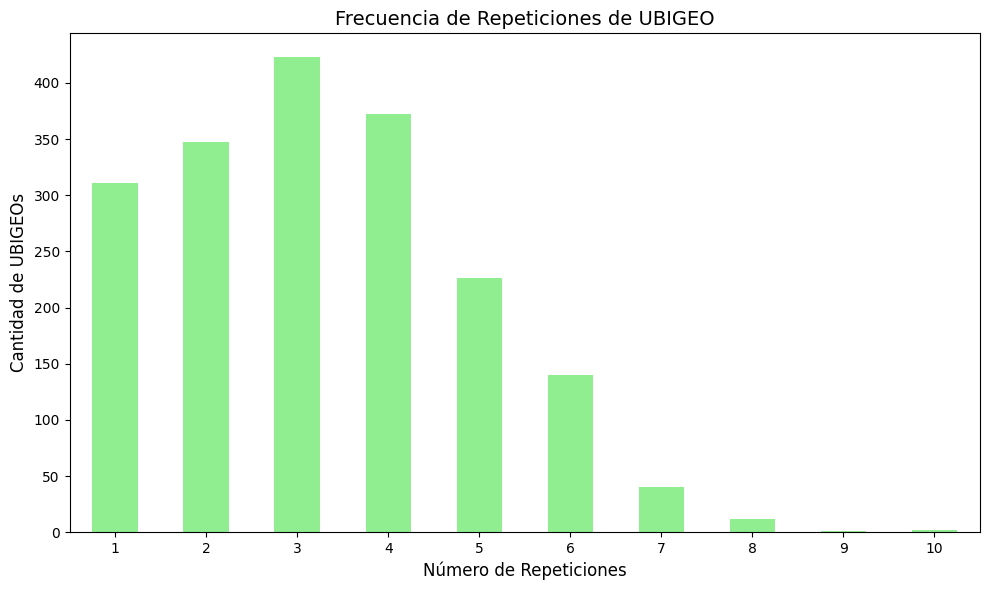

count
1     311
2     347
3     423
4     372
5     226
6     140
7      40
8      12
9       1
10      2
Name: count, dtype: int64


In [ ]:
# Verificar si 'UBIGEO' está en las columnas
if 'UBIGEO' in gdf.columns:
    # Contar las frecuencias de los UBIGEO
    ubigeo_counts = gdf['UBIGEO'].value_counts()

    # Calcular la frecuencia de las frecuencias
    freq_of_freq = ubigeo_counts.value_counts().sort_index()

    # Filtrar para frecuencias del 1 al 10
    freq_of_freq_1_to_10 = freq_of_freq[freq_of_freq.index <= 10]

    # Graficar
    plt.figure(figsize=(10, 6))
    freq_of_freq_1_to_10.plot(kind='bar', color='lightgreen')
    plt.title('Frecuencia de Repeticiones de UBIGEO', fontsize=14)
    plt.xlabel('Número de Repeticiones', fontsize=12)
    plt.ylabel('Cantidad de UBIGEOs', fontsize=12)
    plt.xticks(range(len(freq_of_freq_1_to_10.index)), freq_of_freq_1_to_10.index, rotation=0, fontsize=10)
    plt.tight_layout()

    # Mostrar gráfico
    plt.show()

    # Imprimir tabla de frecuencia de repeticiones
    print(freq_of_freq_1_to_10)
else:
    print("La columna 'UBIGEO' no existe en el DataFrame.")

In [ ]:
print("\n--------------------Información inicial--------------------")
print(f"Total de filas antes de la limpieza: {len(gdf)}")
print("Frecuencia de clases en P.E antes de la limpieza:")
print(gdf[['NOMBDEP', 'NOMBPROV', 'NOMBDIST']].value_counts())

# Eliminar filas con nulos o ceros en las columnas de P.E
gdf_cleaned = gdf.dropna(subset=['NOMBDEP', 'NOMBPROV', 'NOMBDIST'])
gdf_cleaned = gdf_cleaned[~((gdf_cleaned['NOMBDEP'] == 0) | (gdf_cleaned['NOMBPROV'] == 0) | (gdf_cleaned['NOMBDIST'] == 0))]

# Mostrar información después de la limpieza
print("\n--------------------Información después de la limpieza--------------------")
print(f"Total de filas después de la limpieza: {len(gdf_cleaned)}")
print("Frecuencia de clases en P.E después de la limpieza:")
print(gdf_cleaned[['NOMBDEP', 'NOMBPROV', 'NOMBDIST']].value_counts())


--------------------Información inicial--------------------
Total de filas antes de la limpieza: 6153
Frecuencia de clases en P.E antes de la limpieza:
NOMBDEP     NOMBPROV        NOMBDIST              
JUNIN       SATIPO          PANGOA                    10
AREQUIPA    CASTILLA        CHACHAS                   10
MOQUEGUA    MARISCAL NIETO  CARUMAS                    9
PUNO        CARABAYA        AYAPATA                    8
JUNIN       SATIPO          MAZAMARI                   8
                                                      ..
PIURA       SECHURA         CRISTO NOS VALGA           1
                            BERNAL                     1
                            BELLAVISTA DE LA UNION     1
            PIURA           VEINTISEIS DE OCTUBRE      1
LAMBAYEQUE  CHICLAYO        ETEN                       1
Name: count, Length: 1874, dtype: int64

--------------------Información después de la limpieza--------------------
Total de filas después de la limpieza: 6137
Frecuenci

/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:956: UserWarning: Glyph 49191 (\N{HANGUL SYLLABLE BBWID}) missing from current font.
  ax.figure.canvas.draw_idle()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49191 (\N{HANGUL SYLLABLE BBWID}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


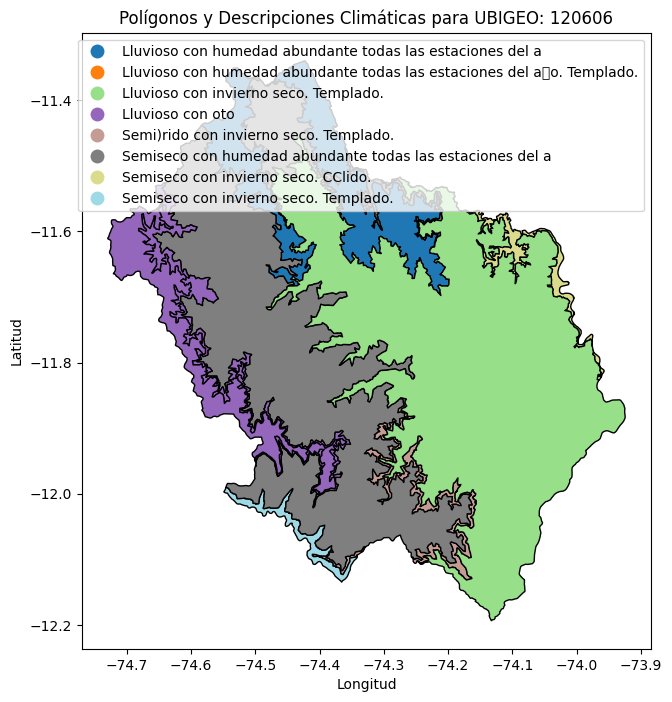


--------------------Descripciones encontradas para el UBIGEO seleccionado--------------------
descripcio
Semiseco con humedad abundante todas las estaciones del a                 2
Lluvioso con oto                                                          2
Semi)rido con invierno seco. Templado.                                    1
Semiseco con invierno seco. Templado.                                     1
Lluvioso con humedad abundante todas las estaciones del a                 1
Semiseco con invierno seco. CClido.                                       1
Lluvioso con invierno seco. Templado.                                     1
Lluvioso con humedad abundante todas las estaciones del a쀧o. Templado.    1
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt

# Filtrar un UBIGEO específico para visualizar
ubigeo_to_visualize = '120606'  # Cambia este valor al UBIGEO que desees analizar
gdf_pe = gdf_cleaned[gdf_cleaned['UBIGEO'] == ubigeo_to_visualize]

# Verificar si se encontraron datos para el UBIGEO
if gdf_pe.empty:
    print(f"No se encontraron datos para el UBIGEO: {ubigeo_to_visualize}")
else:
    # Visualizar los polígonos en el mapa con la columna 'descripcio'
    fig, ax = plt.subplots(figsize=(10, 8))
    gdf_pe.plot(column='descripcio', ax=ax, legend=True, cmap='tab20', edgecolor='black')
    ax.set_title(f"Polígonos y Descripciones Climáticas para UBIGEO: {ubigeo_to_visualize}")
    ax.set_xlabel("Longitud")
    ax.set_ylabel("Latitud")
    plt.show()

    # Mostrar información sobre las descripciones climáticas
    print("\n--------------------Descripciones encontradas para el UBIGEO seleccionado--------------------")
    print(gdf_pe['descripcio'].value_counts())


Procesando distritos: 100%|██████████| 1875/1875 [00:07<00:00, 260.00it/s]
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:956: UserWarning: Glyph 19500 (\N{CJK UNIFIED IDEOGRAPH-4C2C}) missing from current font.
  ax.figure.canvas.draw_idle()
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:956: UserWarning: Glyph 17610 (\N{CJK UNIFIED IDEOGRAPH-44CA}) missing from current font.
  ax.figure.canvas.draw_idle()
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:956: UserWarning: Glyph 49708 (\N{HANGUL SYLLABLE SUSS}) missing from current font.
  ax.figure.canvas.draw_idle()
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:956: UserWarning: Glyph 10538 (\N{SOUTH WEST ARROW AND NORTH WEST ARROW}) missing from current font.
  ax.figure.canvas.draw_idle()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 19500 (\N{CJK UNIFIED IDEOGRAPH-4C2C}) missing from current font.
  fig.canvas.print_figure(bytes

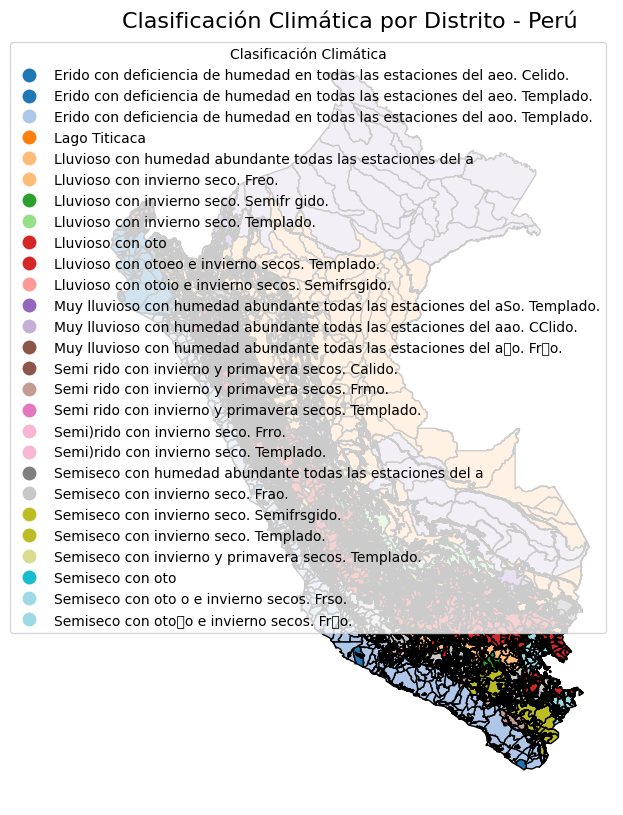


--------------------Resultados finales--------------------
Total de distritos procesados: 1875
Ejemplo de tabla final:
  NOMBDEP  NOMBPROV  NOMBDIST  \
0    None      None      None   
1   TACNA     TACNA     TACNA   
2   TACNA     TACNA     PALCA   
3   TACNA    TARATA    TARATA   
4    PUNO  CHUCUITO  PISACOMA   
5    PUNO   YUNGUYO   YUNGUYO   
6    PUNO   YUNGUYO  OLLARAYA   
7    PUNO      MOHO    TILALI   
8    PUNO  HUANCANE    COJATA   
9    PUNO      MOHO      MOHO   

                             Clasificacion_Climatica  
0                                               None  
1  Erido con deficiencia de humedad en todas las ...  
2           Semiseco con invierno seco. Semifrsgido.  
3           Semiseco con invierno seco. Semifrsgido.  
4         Semiseco con oto o e invierno secos. Frso.  
5                                   Lluvioso con oto  
6         Semiseco con oto o e invierno secos. Frso.  
7                                   Lluvioso con oto  
8                    

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

# Ruta del archivo shapefile
shapefile_path = '/content/CLAS_CLIMA/clasificacion_climatica.shp'

# Leer el GeoDataFrame
gdf = gpd.read_file(shapefile_path)

# Obtener todos los P.E únicos
pes_unicos = gdf[['NOMBDEP', 'NOMBPROV', 'NOMBDIST']].drop_duplicates()

# Inicializar lista para guardar resultados
resultados = []

# Calcular clasificación climática por P.E
for _, pe in tqdm(pes_unicos.iterrows(), total=len(pes_unicos), desc="Procesando distritos"):
    dep, prov, dist = pe['NOMBDEP'], pe['NOMBPROV'], pe['NOMBDIST']
    df_pe = gdf[(gdf['NOMBDEP'] == dep) & (gdf['NOMBPROV'] == prov) & (gdf['NOMBDIST'] == dist)]

    # Agrupar por clasificación y sumar áreas
    clasificaciones = df_pe.groupby('descripcio')['Shape_Area'].sum()

    # Obtener la clasificación con mayor área (moda ponderada por área)
    clasificacion_dominante = clasificaciones.idxmax() if not clasificaciones.empty else None

    resultados.append({
        'NOMBDEP': dep,
        'NOMBPROV': prov,
        'NOMBDIST': dist,
        'Clasificacion_Climatica': clasificacion_dominante
    })

# Crear DataFrame final
df_resultados = pd.DataFrame(resultados)

# Unir resultados al GeoDataFrame original para graficar
gdf_resultados = gdf[['NOMBDEP', 'NOMBPROV', 'NOMBDIST', 'geometry']].drop_duplicates()
gdf_resultados = gdf_resultados.merge(df_resultados, on=['NOMBDEP', 'NOMBPROV', 'NOMBDIST'], how='left')

# Generar un mapa con colores únicos por clasificación
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
gdf_resultados.plot(column='Clasificacion_Climatica', ax=ax, legend=True, cmap='tab20', edgecolor='black',
                    legend_kwds={'title': "Clasificación Climática"})
ax.set_title("Clasificación Climática por Distrito - Perú", fontsize=16)
ax.axis('off')
plt.show()

# Mostrar estadísticas finales
print("\n--------------------Resultados finales--------------------")
print(f"Total de distritos procesados: {len(df_resultados)}")
print("Ejemplo de tabla final:")
print(df_resultados.head(10))  # Muestra las primeras 10 filas como ejemplo

# Guardar resultados en un archivo CSV
df_resultados.to_csv('clasificacion_climatica_distritos.csv', index=False)

print("\nTabla completa guardada como 'clasificacion_climatica_distritos.csv'")


/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:956: UserWarning: Glyph 19500 (\N{CJK UNIFIED IDEOGRAPH-4C2C}) missing from current font.
  ax.figure.canvas.draw_idle()
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:956: UserWarning: Glyph 17610 (\N{CJK UNIFIED IDEOGRAPH-44CA}) missing from current font.
  ax.figure.canvas.draw_idle()
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:956: UserWarning: Glyph 49708 (\N{HANGUL SYLLABLE SUSS}) missing from current font.
  ax.figure.canvas.draw_idle()
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:956: UserWarning: Glyph 10538 (\N{SOUTH WEST ARROW AND NORTH WEST ARROW}) missing from current font.
  ax.figure.canvas.draw_idle()
/usr/local/lib/python3.10/dist-packages/matplotlib/_tight_bbox.py:67: RuntimeWarning: divide by zero encountered in scalar divide
  fig.patch.set_bounds(x0 / w1, y0 / h1,
/usr/local/lib/python3.10/dist-packages/matplotlib/_tight_bbox.py:68: RuntimeWarning: divide

Archivos guardados:
- mapa_sin_leyenda.png
- leyenda_clasificacion_climatica.png


/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 19500 (\N{CJK UNIFIED IDEOGRAPH-4C2C}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 17610 (\N{CJK UNIFIED IDEOGRAPH-44CA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49708 (\N{HANGUL SYLLABLE SUSS}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 10538 (\N{SOUTH WEST ARROW AND NORTH WEST ARROW}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 19500 (\N{CJK UNIFIED IDEOGRAPH-4C2C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 1

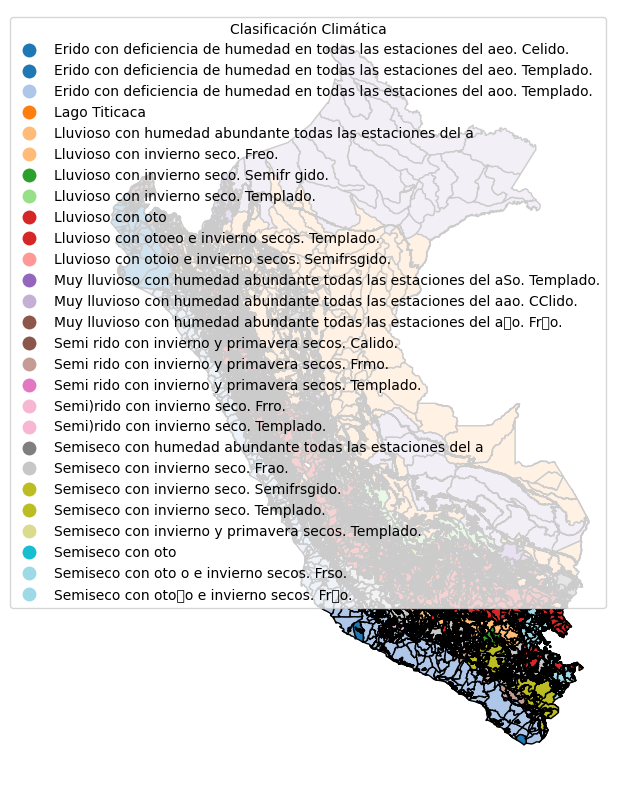

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Crear mapa sin leyenda
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
gdf_resultados.plot(column='Clasificacion_Climatica', ax=ax, cmap='tab20', edgecolor='black')
ax.set_title("Clasificación Climática por Distrito - Perú", fontsize=16)
ax.axis('off')

# Guardar mapa sin leyenda
plt.savefig('mapa_sin_leyenda.png', dpi=300, bbox_inches='tight')
plt.close()

# Crear mapa con leyenda
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
gdf_resultados.plot(column='Clasificacion_Climatica', ax=ax, cmap='tab20', edgecolor='black', legend=True,
                    legend_kwds={'title': "Clasificación Climática"})
ax.axis('off')

# Extraer solo la leyenda
handles, labels = ax.get_legend_handles_labels()
fig_legend = plt.figure(figsize=(5, len(labels) * 0.5))  # Ajustar tamaño según cantidad de etiquetas
ax_legend = fig_legend.add_subplot(111)
ax_legend.axis('off')
ax_legend.legend(handles, labels, loc='center', title="Clasificación Climática", frameon=False)

# Guardar leyenda como imagen
plt.savefig('leyenda_clasificacion_climatica.png', dpi=300, bbox_inches='tight')
plt.close()

print("Archivos guardados:")
print("- mapa_sin_leyenda.png")
print("- leyenda_clasificacion_climatica.png")


# EROSION

In [1]:
import geopandas as gpd

# Especifica la ruta al archivo .shp
shapefile_path = '/content/EROSION/2010/2010.shp'  # Cambia esta ruta según dónde lo subas en Colab
gdf = gpd.read_file(shapefile_path)

# Muestra los primeros datos
gdf


,OBJECTID,rango,UBIGEO,NOMBDEP,NOMBPROV,NOMBDIST,Shape_Leng,Shape_Area,X,Y,geometry
0,1,0 - 0.01,None,None,None,None,0.159412,5.511208e-04,-70.440575,-18.308630,"MULTIPOLYGON (((-70.45616 -18.29067, -70.47743..."
1,2,0 - 0.01,None,None,None,None,0.073735,3.396220e-04,-69.940284,-18.268672,"POLYGON ((-69.94945 -18.27792, -69.94997 -18.2..."
2,3,0 - 0.01,None,None,None,None,0.019735,1.736026e-05,-69.953738,-18.258548,"POLYGON ((-69.94997 -18.25992, -69.95784 -18.2..."
3,4,0 - 0.01,None,None,None,None,0.239173,1.811628e-03,-70.304375,-18.320650,"POLYGON ((-70.24616 -18.31363, -70.25011 -18.3..."
4,5,0 - 0.01,None,None,None,None,0.311003,1.696847e-03,-70.080972,-18.294247,"MULTIPOLYGON (((-70.0292 -18.26966, -70.03937 ..."
...,...,...,...,...,...,...,...,...,...,...,...
104036,104037,0.01 - 0.50,010107,AMAZONAS,CHACHAPOYAS,GRANADA,0.001529,2.703123e-09,-77.658526,-6.056527,"POLYGON ((-77.65885 -6.0568, -77.65846 -6.0564..."
104037,104038,1.0 - 10,120606,JUNIN,SATIPO,PANGOA,0.001954,2.135421e-08,-74.440256,-11.346598,"POLYGON ((-74.44061 -11.3468, -74.44049 -11.34..."
104038,104039,1.0 - 10,120604,JUNIN,SATIPO,MAZAMARI,0.001954,2.135421e-08,-74.440256,-11.346598,"POLYGON ((-74.44061 -11.3468, -74.44049 -11.34..."
104039,104040,150 - 200,120606,JUNIN,SATIPO,PANGOA,0.003362,1.217528e-08,-74.439278,-11.346094,"POLYGON ((-74.43975 -11.34635, -74.43979 -11.3..."


In [1]:
import geopandas as gpd
import numpy as np
import pandas as pd
import os
from tqdm import tqdm

# Función para calcular el punto medio de los rangos
def rango_to_midpoint(rango):
    try:
        start, end = map(float, rango.split(' - '))
        return (start + end) / 2
    except:
        return np.nan

# Calcular erosión promedio ponderada para un P.E
def calcular_erosion_promedio_pe(df_pe):
    df_pe = df_pe.dropna(subset=['rango_midpoint', 'Shape_Area'])  # Eliminar nulos
    if len(df_pe) > 0:
        return np.average(df_pe['rango_midpoint'], weights=df_pe['Shape_Area'])
    return np.nan

# Ruta a la carpeta principal que contiene los datos
carpeta_erosion = '/content/EROSION'

# Obtener subcarpetas de los años que contengan un archivo .shp
subcarpetas_anos = [
    f for f in os.listdir(carpeta_erosion)
    if os.path.isdir(os.path.join(carpeta_erosion, f)) and
    any(file.endswith('.shp') for file in os.listdir(os.path.join(carpeta_erosion, f)))
]

# Inicializar DataFrame para los resultados
tabla_global = pd.DataFrame()

# Iterar por cada subcarpeta (año)
for subcarpeta in subcarpetas_anos:
    print(f"\nProcesando datos del año: {subcarpeta}")
    shapefile_path = os.path.join(carpeta_erosion, subcarpeta, f"{subcarpeta}.shp")

    # Verificar si el archivo existe antes de procesar
    if not os.path.exists(shapefile_path):
        print(f"Archivo no encontrado: {shapefile_path}, saltando este año.")
        continue

    # Leer el GeoDataFrame
    gdf = gpd.read_file(shapefile_path)

    # Calcular el punto medio de los rangos
    gdf['rango_midpoint'] = gdf['rango'].apply(rango_to_midpoint)

    # Obtener todos los P.E únicos
    pes_unicos = gdf[['NOMBDEP', 'NOMBPROV', 'NOMBDIST']].drop_duplicates()

    # Inicializar lista para guardar resultados del año
    resultados_ano = []

    # Calcular erosión promedio por P.E
    for _, pe in tqdm(pes_unicos.iterrows(), total=len(pes_unicos), desc=f"Procesando {subcarpeta}"):
        dep, prov, dist = pe['NOMBDEP'], pe['NOMBPROV'], pe['NOMBDIST']
        df_pe = gdf[(gdf['NOMBDEP'] == dep) & (gdf['NOMBPROV'] == prov) & (gdf['NOMBDIST'] == dist)]
        erosion_promedio = calcular_erosion_promedio_pe(df_pe)
        resultados_ano.append({
            'DEPARTAMENTO': dep,
            'PROVINCIA': prov,
            'DISTRITO': dist,
            subcarpeta: erosion_promedio
        })

    # Crear DataFrame del año
    df_resultados_ano = pd.DataFrame(resultados_ano)

    # Combinar con la tabla global
    if tabla_global.empty:
        tabla_global = df_resultados_ano
    else:
        tabla_global = tabla_global.merge(df_resultados_ano, on=['DEPARTAMENTO', 'PROVINCIA', 'DISTRITO'], how='outer')

# Eliminar filas con valores completamente nulos en todas las columnas de años
anos = subcarpetas_anos
tabla_global = tabla_global.dropna(subset=anos, how='all')

# Crear segunda tabla: Promedio ponderado de todos los años
pesos_anos = {ano: i+1 for i, ano in enumerate(anos)}  # Asignar peso creciente a los años
tabla_global['EROSION_PROMEDIO'] = tabla_global[anos].apply(
    lambda row: np.average(row.dropna(), weights=[pesos_anos[ano] for ano in row.dropna().index]) if not row.isnull().all() else np.nan,
    axis=1
)

# Eliminar filas con valores nulos en la columna EROSION_PROMEDIO
tabla_erosion_promedio = tabla_global.dropna(subset=['EROSION_PROMEDIO']).copy()

# Guardar resultados en CSV
tabla_global.to_csv('erosion_por_anos.csv', index=False)
tabla_erosion_promedio[['DEPARTAMENTO', 'PROVINCIA', 'DISTRITO', 'EROSION_PROMEDIO']].to_csv('erosion_promedio.csv', index=False)

# Estadísticas finales
print("\n--------------------Estadísticas finales--------------------")
print(f"Total de distritos procesados: {len(tabla_global)}")
print(f"Total de distritos con erosión promedio calculada: {len(tabla_erosion_promedio)}")
print("\nEjemplo de la tabla anual:")
print(tabla_global.head())
print("\nEjemplo de la tabla de promedio ponderado:")
print(tabla_erosion_promedio[['DEPARTAMENTO', 'PROVINCIA', 'DISTRITO', 'EROSION_PROMEDIO']].head())



Procesando datos del año: 2013


Procesando 2013: 100%|██████████| 1875/1875 [01:19<00:00, 23.60it/s]



Procesando datos del año: 2011


Procesando 2011: 100%|██████████| 1875/1875 [01:19<00:00, 23.63it/s]



Procesando datos del año: 2014


Procesando 2014: 100%|██████████| 1875/1875 [00:55<00:00, 34.06it/s]



Procesando datos del año: 2010


Procesando 2010: 100%|██████████| 1875/1875 [01:32<00:00, 20.20it/s]



Procesando datos del año: 2012


Procesando 2012: 100%|██████████| 1875/1875 [01:33<00:00, 20.15it/s]



--------------------Estadísticas finales--------------------
Total de distritos procesados: 1872
Total de distritos con erosión promedio calculada: 1872

Ejemplo de la tabla anual:
  DEPARTAMENTO PROVINCIA  DISTRITO       2013       2011       2014  \
0     AMAZONAS     BAGUA  ARAMANGO  13.916066  14.098893  20.393507   
1     AMAZONAS     BAGUA     BAGUA  25.725816  24.273914  26.529220   
2     AMAZONAS     BAGUA  COPALLIN  12.906795  13.946381  11.905723   
3     AMAZONAS     BAGUA  EL PARCO  11.462682  11.462682  23.317362   
4     AMAZONAS     BAGUA     IMAZA   3.634894   4.725378   5.104816   

        2010       2012  EROSION_PROMEDIO  
0  12.483673  14.747511         15.131108  
1  17.646082  25.066683         23.318603  
2  11.248494  14.073667         12.791936  
3   6.076169  11.462682         12.397214  
4   4.153188   4.101088          4.367886  

Ejemplo de la tabla de promedio ponderado:
  DEPARTAMENTO PROVINCIA  DISTRITO  EROSION_PROMEDIO
0     AMAZONAS     BAGUA  ARAM